## Global Power Plant Database

#### Project Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database

The database includes the following indicators:
	
•	`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification

•	`country_long` (text): longer form of the country designation

•	`name` (text): name or title of the power plant, generally in Romanized form

•	`gppd_idnr` (text): 10 or 12 character identifier for the power plant

•	`capacity_mw` (number): electrical generating capacity in megawatts

•	`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

•	`primary_fuel` (text): energy source used in primary electricity generation or export

•	`other_fuel1` (text): energy source used in electricity generation or export

•	`other_fuel2` (text): energy source used in electricity generation or export

•	`other_fuel3` (text): energy source used in electricity generation or export

•	 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

•	`owner` (text): majority shareholder of the power plant, generally in Romanized form

•	`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

•	`url` (text): web document corresponding to the `source` field

•	`geolocation_source` (text): attribution for geolocation information

•	`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

•	`year_of_capacity_data` (number): year the capacity information was reported

•	`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

•	`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

•	`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

•	`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

•	`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

•	`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

•	`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

•	`generation_data_source` (text): attribution for the reported generation information

•	`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

•	`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

•	`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

•	`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 

•	`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

•	'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

•	`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

•	`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

•	`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

•	`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
url= "https://raw.githubusercontent.com/arjun0200/Datasets/main/global_plant_database_IND.csv"
df= pd.read_csv(url)
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

   year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0                    NaN                  NaN                 NaN   
1                    NaN                  NaN                 NaN   
2                    NaN                  NaN                 NaN   
3                 2019.0                  NaN          617.789264   
4                 2019.0                  NaN         3035.550000   

  generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3             843.747          886.004428          663.774500   
4            5916.370         6243.000000         5385.579736   

   generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           626.239128                  NaN  Central Electricity Authority   
4          7279.000000                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 27 columns]

In [3]:
df.shape

(907, 27)

In [4]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df.sample(20)

country country_long                                   name   gppd_idnr  \
341     IND        India                                  KHARA  IND0000195   
319     IND        India                              KAMALANGA  IND0000178   
457     IND        India                              MALLARPUR  IND0000254   
743     IND        India                              SURATGARH  IND0000431   
501     IND        India    Mandrup - Giriraj Solar Power Plant  WRI1026170   
147     IND        India                            CHHABRA TPS  IND0000081   
865     IND        India                               VAITARNA  IND0000493   
748     IND        India                   SWPPL Madhavakurichi  WRI1026771   
35      IND        India     Askandra - Khaya Solar Power Plant  WRI1026109   
781     IND        India                               T.B. DAM  IND0000436   
53      IND        India                          BANSAGAR (II)  IND0000030   
358     IND        India                         KONASEEMA CCCP  IND0000205   
747     IND        India                          SWASTIK KORBA  IND0000435   
58      IND        India                               BARAMURA  IND0000034   
393     IND        India              Kamuthi Solar Power Plant  WRI1026151   
462     IND        India                               MANI DPH  IND0000256   
617     IND        India  Punjawa - Sikh Wala Solar Power Plant  WRI1026187   
209     IND        India                           FARAKKA STPS  IND0000117   
402     IND        India  Khetusar - Northern Solar Power Plant  WRI1026159   
793     IND        India                              TASHIDING  IND0000537   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
341         72.0   30.3508    77.6017        Hydro         NaN         NaN   
319       1050.0   20.8700    85.2671         Coal         Oil         NaN   
457          9.0   15.3773    76.4591        Hydro         NaN         NaN   
743       1500.0   29.1790    74.0202         Coal         Oil         NaN   
501          6.6   17.4999    75.7810        Solar         NaN         NaN   
147       2320.0   24.6217    77.0357         Coal         Oil         NaN   
865         60.0   19.7674    73.5020        Hydro         NaN         NaN   
748         10.5    8.8230    77.6271         Wind         NaN         NaN   
35           5.0   27.3661    71.6916        Solar         NaN         NaN   
781         36.0   15.2615    76.3379        Hydro         NaN         NaN   
53          30.0   24.1917    81.2875        Hydro         NaN         NaN   
358        445.0   16.7346    81.8622          Gas         NaN         NaN   
747         25.0   22.3005    82.7047         Coal         Oil         NaN   
58          42.0   23.8070    91.5650          Gas         NaN         NaN   
393        648.0    9.3381    78.3917        Solar         NaN         NaN   
462          9.0   13.6763    75.0462        Hydro         NaN         NaN   
617         19.0   30.0208    74.5460        Solar         NaN         NaN   
209       2100.0   24.7720    87.8940         Coal         Oil         NaN   
402         20.0   27.3225    71.9951        Solar         NaN         NaN   
793         97.0   27.3403    88.2332        Hydro         NaN         NaN   

     other_fuel3  commissioning_year  \
341          NaN              1992.0   
319          NaN              2013.0   
457          NaN              1993.0   
743          NaN              2002.0   
501          NaN                 NaN   
147          NaN              2015.0   
865          NaN              1976.0   
748          NaN                 NaN   
35           NaN                 NaN   
781          NaN              1960.0   
53           NaN              2002.0   
358          NaN              2009.0   
747          NaN              2015.0   
58           NaN              2006.0   
393          NaN                 NaN   
462          NaN              1993.0   
617          NaN         

We can observe that few columns are with maximum null values. Let's study further before making any conclusion.

In [7]:
# check for null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df.isnull().sum().sum()

10445

There are 10445 null values present in the dataset.

In [9]:
# check for duplicate rows
df.duplicated().sum()

0

No duplicate rows present in the dataset.

In [10]:
df.head()

country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  other_fuel3  \
0   28.1839    73.2407        Solar         NaN         NaN          NaN   
1   24.7663    74.6090         Coal         NaN         NaN          NaN   
2   21.9038    69.3732         Wind         NaN         NaN          NaN   
3   23.8712    91.3602          Gas         NaN         NaN          NaN   
4   21.9603    82.4091         Coal         Oil         NaN          NaN   

   commissioning_year                 owner  \
0              2011.0           Solar Paces   
1                 NaN  Ultratech Cement ltd   
2                 NaN                   AES   
3              2004.0                   NaN   
4              2015.0                   NaN   

                                 source  \
0  National Renewable Energy Laboratory   
1                  Ultratech Cement ltd   
2                                   CDM   
3         Central Electricity Authority   
4         Central Electricity Authority   

                                                 url  \
0  http://www.nrel.gov/csp/solarpaces/project_det...   
1                    http://www.ultratechcement.com/   
2  https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                             http://www.cea.nic.in/   
4                             http://www.cea.nic.in/   

                     geolocation_source  wepp_id  year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                    NaN   
1                                   WRI      NaN                    NaN   
2                                   WRI      NaN                    NaN   
3                                   WRI      NaN                 2019.0   
4                                   WRI      NaN                 2019.0   

   generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN           617.789264              843.747   
4                  NaN          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3           886.004428           663.774500           626.239128   
4          6243.000000          5385.579736          7279.000000   

   generation_gwh_2019         generation_data_source  \
0                  NaN                            NaN   
1                  NaN                            NaN   
2                  NaN                            NaN   
3                  NaN  Central Electricity Authority   
4                  NaN  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [11]:
# checking info and if anything unusual present.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Here we can see that columns 'other_fuel2', 'other_fuel3', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2019', 'estimated_generation_gwh' got 100% as null values. We must delete them.

In [12]:
df.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

Observing mean, std, quartiles and max values there are outliers and skewness in the dataset. Also, one of the reason could be the presence of large number of null values.

In [13]:
df.skew()

capacity_mw                 3.123576
latitude                   -0.145866
longitude                   1.112646
other_fuel3                      NaN
commissioning_year         -1.067949
wepp_id                          NaN
year_of_capacity_data       0.000000
generation_gwh_2013              NaN
generation_gwh_2014         3.342707
generation_gwh_2015         3.665904
generation_gwh_2016         3.512370
generation_gwh_2017         3.566070
generation_gwh_2018         3.476298
generation_gwh_2019              NaN
estimated_generation_gwh         NaN
dtype: float64

In [14]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

'name' and 'gppd_idnr' got 907 unique values, same as the number of rows.

'country', 'country_long', 'other_fuel2', 'year_of_capacity_data' and 'generation_data_source' have only 1 unique values.

We need to learn more about these columns.

In [15]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [61]:
target='primary_fuel'

### More on Columns

In [17]:
pd.DataFrame({'Unique_values': df.nunique(), 'Null_values': df.isnull().sum()})

Unique_values  Null_values
country                               1            0
country_long                          1            0
name                                907            0
gppd_idnr                           907            0
capacity_mw                         361            0
latitude                            836           46
longitude                           827           46
primary_fuel                          8            0
other_fuel1                           3          709
other_fuel2                           1          906
other_fuel3                           0          907
commissioning_year                   73          380
owner                               280          565
source                              191            0
url                                 304            0
geolocation_source                    3           19
wepp_id                               0          907
year_of_capacity_data                 1          388
generation_gwh_2013                   0          907
generation_gwh_2014                 371          509
generation_gwh_2015                 396          485
generation_gwh_2016                 403          473
generation_gwh_2017                 408          467
generation_gwh_2018                 410          459
generation_gwh_2019                   0          907
generation_data_source                1          458
estimated_generation_gwh              0          907

Sorting columns with all null values

In [18]:
li=[]
for i in df:
    if df[i].isnull().sum() == len(df):
        li.append(i)
li

['other_fuel3',
 'wepp_id',
 'generation_gwh_2013',
 'generation_gwh_2019',
 'estimated_generation_gwh']

Sorting columns with all unique or single unique values.

In [19]:
for i in df:
    if (df[i].nunique()==1) or (df[i].nunique()==len(df)):
        print(i)
        print(df[i].value_counts())
        print()
        li.append(i)
        
print('Length of unwanted columns are now',len(li))

country
IND    907
Name: country, dtype: int64

country_long
India    907
Name: country_long, dtype: int64

name
ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64

gppd_idnr
WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64

other_fuel2
Oil    1
Name: other_fuel2, dtype: int64

year_of_capacity_data
2019.0    519
Name: year_of_capacity_data, dtype: int64

generation_data_source
Central Electricity Authority    449
Name: generation_data_source, dtype: int64

Length of unwanted columns are now 12


The data is of only one country- INDIA. This column is not of much importance.

'name' column contains name of the place or the plant and holds all unique values, which again is not useful for model training.

'gppd_idnr' is an identifier for the plant which is again holds unique value for each unique powerplant. This is also not useful.

There is only one value in 'other_fuel2' column as oil and remaining all rows are null.

'year_of_capacity_data' gives us the information about the year when this dataset was recorded which is again same for all columns.

In [20]:
df[['owner', 'source', 'url']].sample(20)

owner  \
422                                                NaN   
92                                                 NaN   
354                           Hemarus Technologies ltd   
746                                                NaN   
649                                                NaN   
424                         LNJ Power Ventures Limited   
417                                                NaN   
475                                                NaN   
624                              Surana Industries ltd   
632                                                NaN   
601                                                NaN   
299  West Bengal Energy Development Corporation Lim...   
138                                     Birla Corp ltd   
165                                   Davangere Co ltd   
666                       Indian Oil Corporation (IOC)   
450                                  Mahatma Power ltd   
579                                                NaN   
55                                                 NaN   
342                                                NaN   
741                                                NaN   

                                                source  \
422                      Central Electricity Authority   
92                       Central Electricity Authority   
354                           Hemarus Technologies ltd   
746                      Central Electricity Authority   
649                      Central Electricity Authority   
424                                                CDM   
417                      Central Electricity Authority   
475                      Central Electricity Authority   
624                              Surana Industries ltd   
632                      Central Electricity Authority   
601                      Central Electricity Authority   
299  West Bengal Energy Development Corporation Lim...   
138                                     Birla Corp ltd   
165                                   Davangere Co ltd   
666                       Indian Oil Corporation (IOC)   
450                                  Mahatma Power ltd   
579                      Central Electricity Authority   
55                       Central Electricity Authority   
342                      Central Electricity Authority   
741                      Central Electricity Authority   

                                                   url  
422                             http://www.cea.nic.in/  
92                              http://www.cea.nic.in/  
354           http://www.hemarus.co.in/facilities.html  
746                             http://www.cea.nic.in/  
649                             http://www.cea.nic.in/  
424  https://cdm.unfccc.int/Projects/DB/KBS_Cert135...  
417                             http://www.cea.nic.in/  
475                             http://www.cea.nic.in/  
624                          http://www.suranaind.com/  
632                             http://www.cea.nic.in/  
601                             http://www.cea.nic.in/  
299                                http://wbpdcl.co.in  
138                   http://www.birlacorporation.com/  
165  http://biomass-power.industry-focus.net/karnat...  
666                               https://www.iocl.com  
450  https://www.zaubacorp.com/company/MAHATMA-SUGA...  
579                             http://www.cea.nic.in/  
55                              http://www.cea.nic.in/  
342                             http://www.cea.nic.in/  
741                             http://www.cea.nic.in/

Also, columns such as owner, source and url are not much of an importance

In [21]:
li.extend(['owner', 'source', 'url'])
len(li)

15

Let's drop these 15 columns.

In [22]:
df=df.drop(li, axis=1)
df

capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0            2.5   28.1839    73.2407        Solar         NaN   
1           98.0   24.7663    74.6090         Coal         NaN   
2           39.2   21.9038    69.3732         Wind         NaN   
3          135.0   23.8712    91.3602          Gas         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil   
..           ...       ...        ...          ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil   
903          3.0   12.8932    78.1654        Solar         NaN   
904         25.5   15.2758    75.5811         Wind         NaN   
905         80.0   24.3500    73.7477         Coal         NaN   
906         16.5    9.9344    77.4768         Wind         NaN   

     commissioning_year                    geolocation_source  \
0                2011.0  National Renewable Energy Laboratory   
1                   NaN                                   WRI   
2                   NaN                                   WRI   
3                2004.0                                   WRI   
4                2015.0                                   WRI   
..                  ...                                   ...   
902              2016.0                                   WRI   
903                 NaN                        Industry About   
904                 NaN                                   WRI   
905                 NaN                                   WRI   
906                 NaN                                   WRI   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
0                    NaN                  NaN                  NaN   
1                    NaN                  NaN                  NaN   
2                    NaN                  NaN                  NaN   
3             617.789264           843.747000           886.004428   
4            3035.550000          5916.370000          6243.000000   
..                   ...                  ...                  ...   
902                  NaN             0.994875           233.596650   
903                  NaN                  NaN                  NaN   
904                  NaN                  NaN                  NaN   
905                  NaN                  NaN                  NaN   
906                  NaN                  NaN                  NaN   

     generation_gwh_2017  generation_gwh_2018  
0                    NaN                  NaN  
1                    NaN                  NaN  
2                    NaN                  NaN  
3             663.774500           626.239128  
4            5385.579736          7279.000000  
..                   ...                  ...  
902           865.400000           686.500000  
903                  NaN                  NaN  
904                  NaN                  NaN  
905                  NaN                  NaN  
906                  NaN                  NaN  

[907 rows x 12 columns]

In [23]:
pd.DataFrame({'Unique_values': df.nunique(), 'Null_values': df.isnull().sum()})

Unique_values  Null_values
capacity_mw                    361            0
latitude                       836           46
longitude                      827           46
primary_fuel                     8            0
other_fuel1                      3          709
commissioning_year              73          380
geolocation_source               3           19
generation_gwh_2014            371          509
generation_gwh_2015            396          485
generation_gwh_2016            403          473
generation_gwh_2017            408          467
generation_gwh_2018            410          459

In [24]:
for i in df:
    if df[i].nunique()<=10:
        print(i)
        print(df[i].value_counts())
        print()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

other_fuel1
Oil             195
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

geolocation_source
WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64



#### <font color='Blue'>Separating categorical and continuous variables</font>

In [25]:
df.nunique()

capacity_mw            361
latitude               836
longitude              827
primary_fuel             8
other_fuel1              3
commissioning_year      73
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [26]:
# continuous variables
con=df.select_dtypes(include= 'number').columns
con

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [27]:
# categorical columns
cat=df.select_dtypes(exclude= 'number').columns
cat

Index(['primary_fuel', 'other_fuel1', 'geolocation_source'], dtype='object')

#### Null values

In [28]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [29]:
# null values in terms of percentage
perc= round(df.isnull().sum()/len(df)*100,2)

In [30]:
pd.DataFrame({'Columns': df.isnull().sum().index, 'Number_of_null_values':df.isnull().sum().values,
             'Perectage_null_values': perc.values})

Columns  Number_of_null_values  Perectage_null_values
0           capacity_mw                      0                   0.00
1              latitude                     46                   5.07
2             longitude                     46                   5.07
3          primary_fuel                      0                   0.00
4           other_fuel1                    709                  78.17
5    commissioning_year                    380                  41.90
6    geolocation_source                     19                   2.09
7   generation_gwh_2014                    509                  56.12
8   generation_gwh_2015                    485                  53.47
9   generation_gwh_2016                    473                  52.15
10  generation_gwh_2017                    467                  51.49
11  generation_gwh_2018                    459                  50.61

In [31]:
perc

capacity_mw             0.00
latitude                5.07
longitude               5.07
primary_fuel            0.00
other_fuel1            78.17
commissioning_year     41.90
geolocation_source      2.09
generation_gwh_2014    56.12
generation_gwh_2015    53.47
generation_gwh_2016    52.15
generation_gwh_2017    51.49
generation_gwh_2018    50.61
dtype: float64

In [32]:
df[cat].isnull().sum()

primary_fuel            0
other_fuel1           709
geolocation_source     19
dtype: int64

In [33]:
df[con].isnull().sum()

capacity_mw              0
latitude                46
longitude               46
commissioning_year     380
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

We will fill the null values of categorical column with most occuring category.

For numerical columns, we need to find out the best way to fill the null values from Mean or Median.

1) Numerical columns

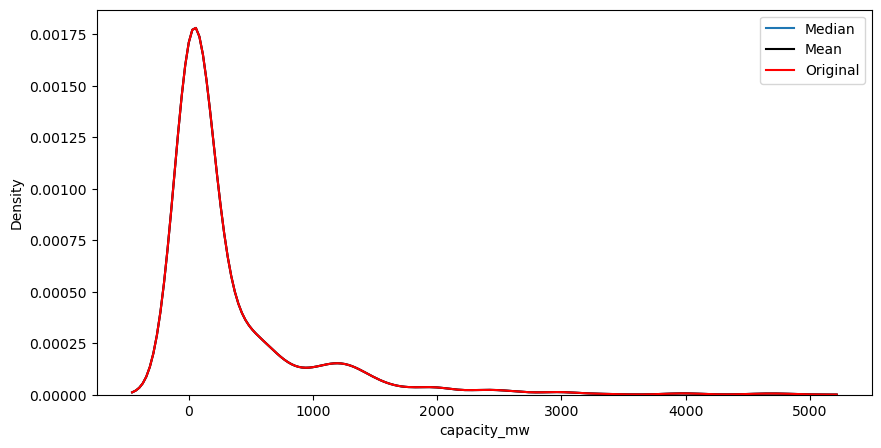

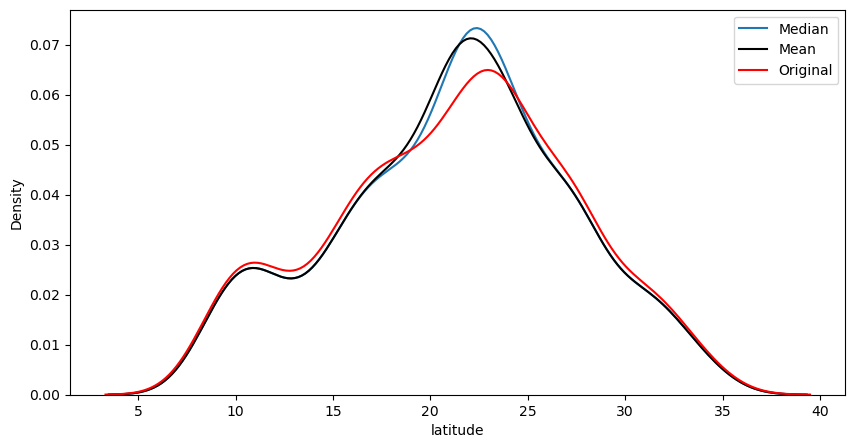

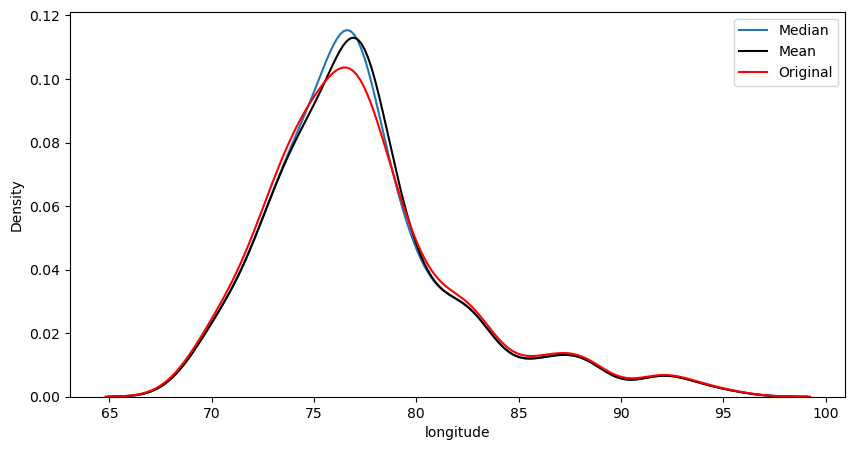

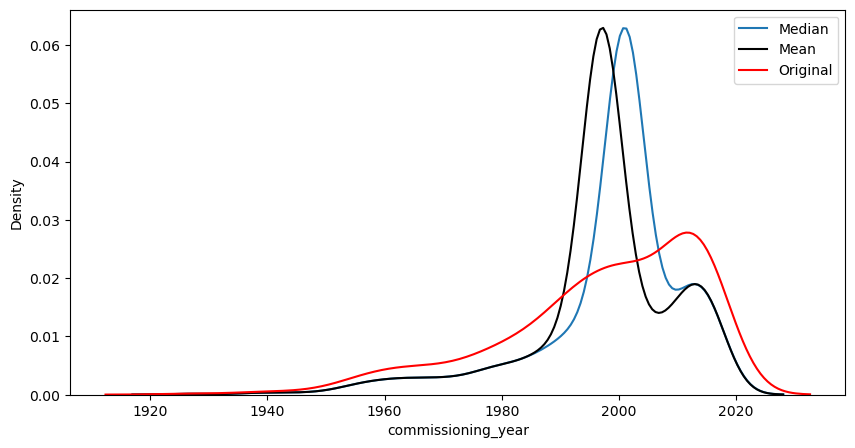

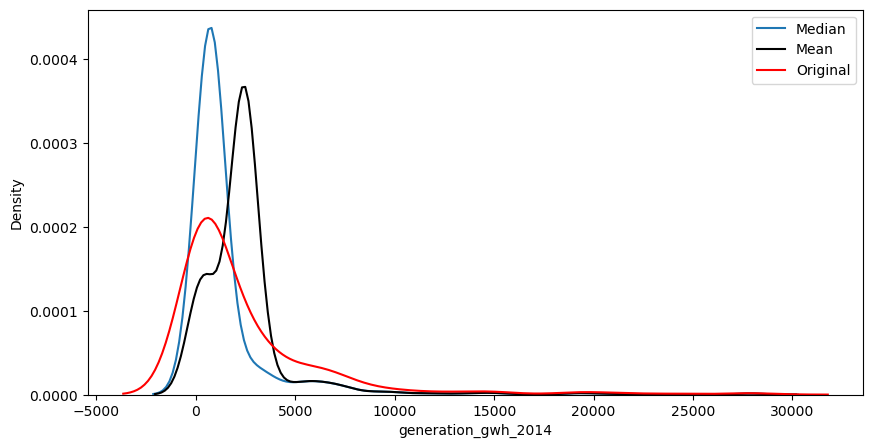

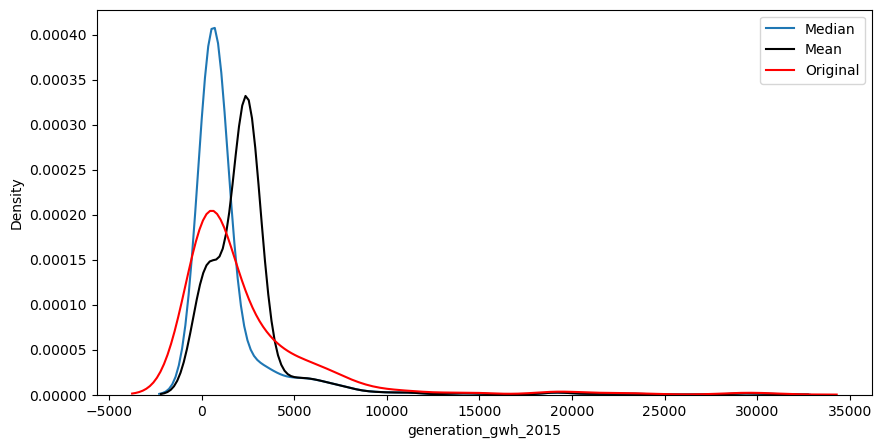

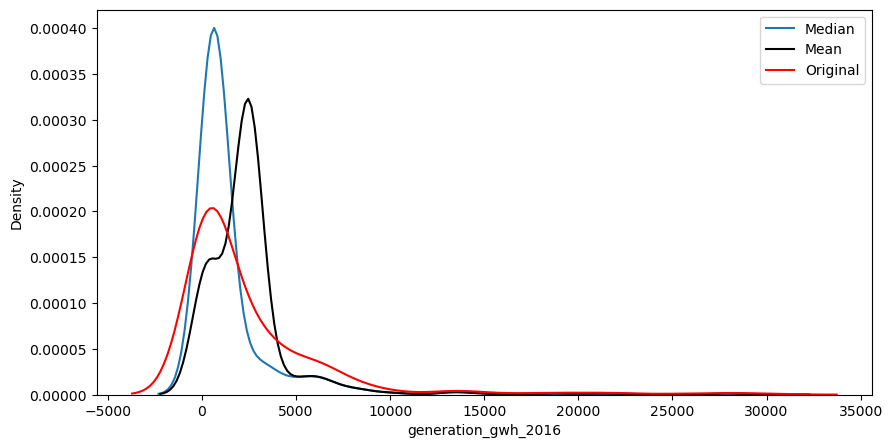

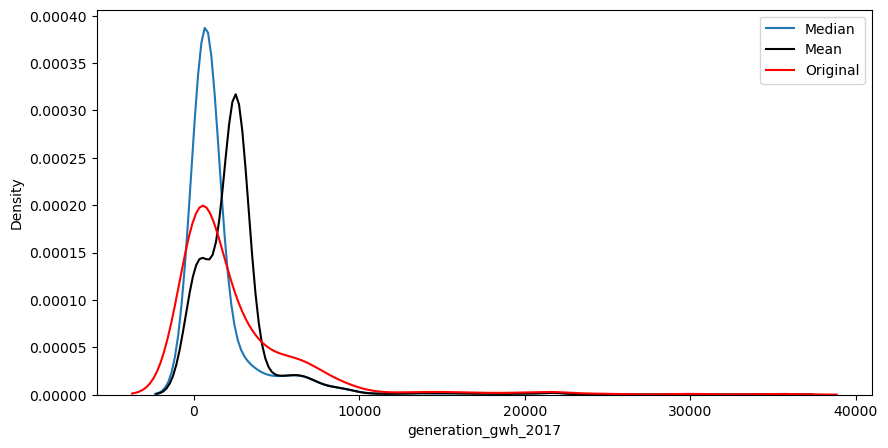

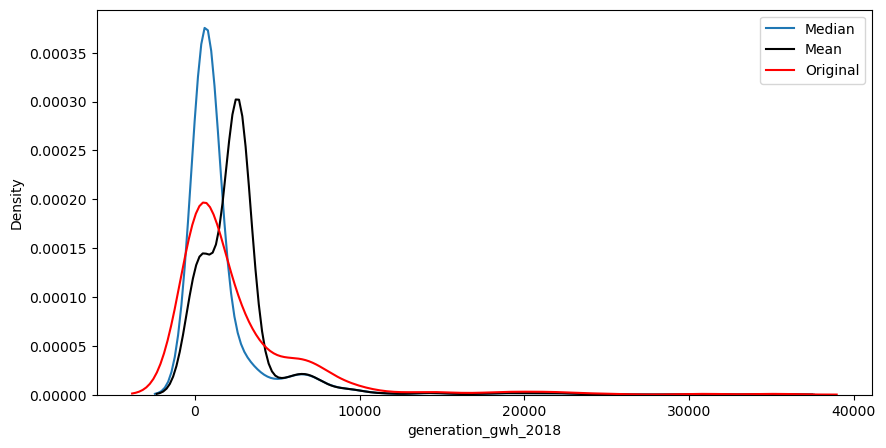

In [34]:
for i in con:
    med= df[i].fillna(df[i].median())
    avg= df[i].fillna(df[i].mean())
    
    plt.figure(figsize=(10,5))
    sns.distplot(med, hist=False )
    sns.distplot(avg, hist=False, color='Black' )
    sns.distplot(df[i], hist=False, color='red')
    plt.legend(['Median', 'Mean', 'Original'])

We can see,the graphs represent that filling null values with mean is better way to fill null values. It adds little disturbance to the original graph as compared to median. 

But even if we fill null by means the distortion is still very much visible. let's see what else we can use to fillna.

In [35]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

Let's consider column 'latitude'

The overall mean of this column is as below:

In [36]:
df['latitude'].mean()

21.1979181184669

In [37]:
df.groupby('primary_fuel')['latitude'].mean()

primary_fuel
Biomass    17.460458
Coal       21.657714
Gas        20.050144
Hydro      22.258483
Nuclear    18.081478
Oil        17.311847
Solar      24.095380
Wind       17.857224
Name: latitude, dtype: float64

Lets try category-wise mean based on primary_fuel.

In [38]:
for i in con:
    print("Column:",i)
    print(df.groupby('primary_fuel')[i].mean())
    print()

Column: capacity_mw
primary_fuel
Biomass     20.065200
Coal       797.826434
Gas        364.818928
Hydro      185.026972
Nuclear    975.555556
Oil         88.942000
Solar       21.712598
Wind        33.429675
Name: capacity_mw, dtype: float64

Column: latitude
primary_fuel
Biomass    17.460458
Coal       21.657714
Gas        20.050144
Hydro      22.258483
Nuclear    18.081478
Oil        17.311847
Solar      24.095380
Wind       17.857224
Name: latitude, dtype: float64

Column: longitude
primary_fuel
Biomass    75.679052
Coal       79.431460
Gas        78.408238
Hydro      78.846256
Nuclear    76.124056
Oil        74.833806
Solar      74.352328
Wind       74.181553
Name: longitude, dtype: float64

Column: commissioning_year
primary_fuel
Biomass            NaN
Coal       2006.021164
Gas        2002.830508
Hydro      1988.709163
Nuclear    1994.250000
Oil        1994.583333
Solar      2013.375000
Wind               NaN
Name: commissioning_year, dtype: float64

Column: generation_gwh_2014


We can use these different mean values to fill the null values

let's plot them and compare with regular methods if we are getting better results.

After that the remaining nan columns as we can see above, can be filled by mean values.

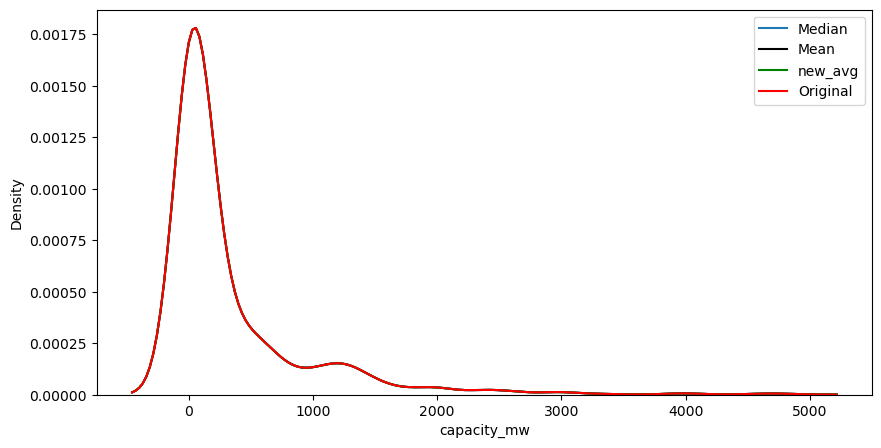

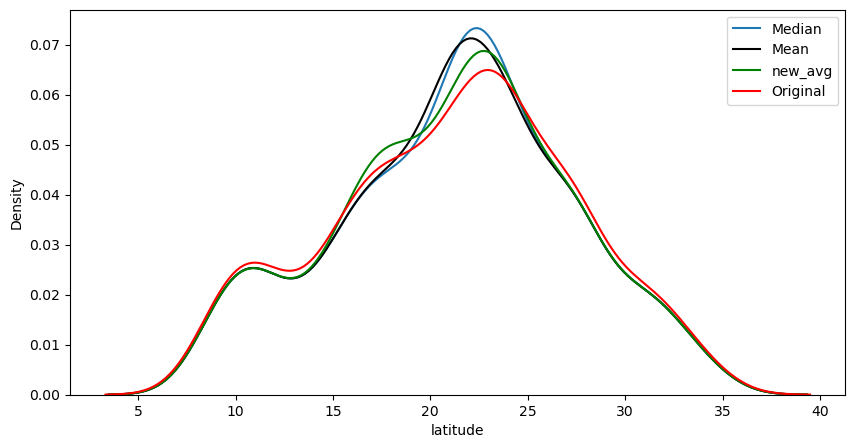

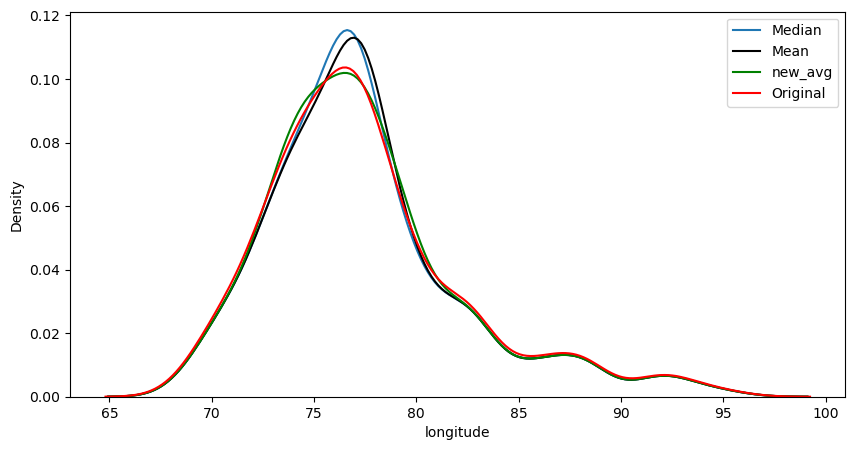

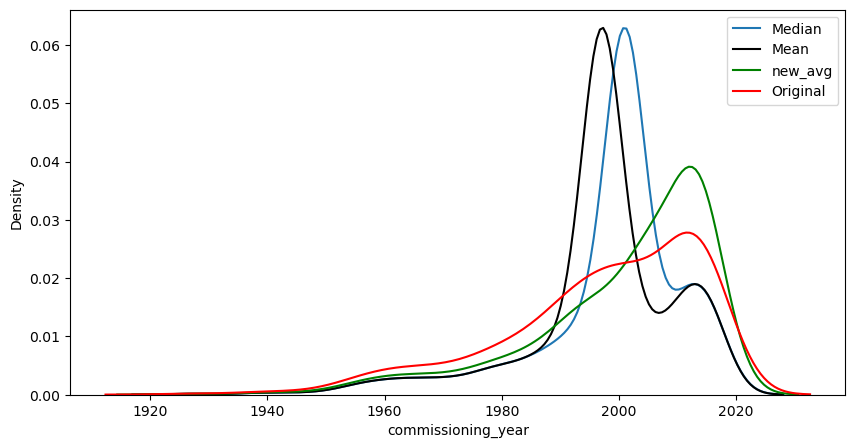

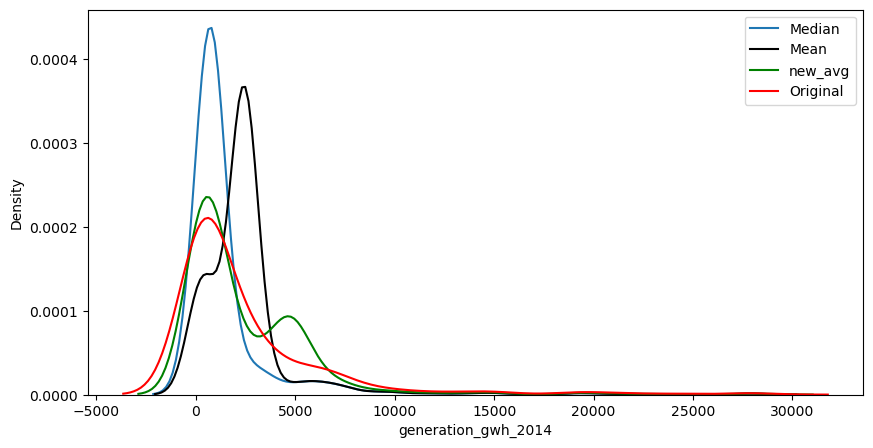

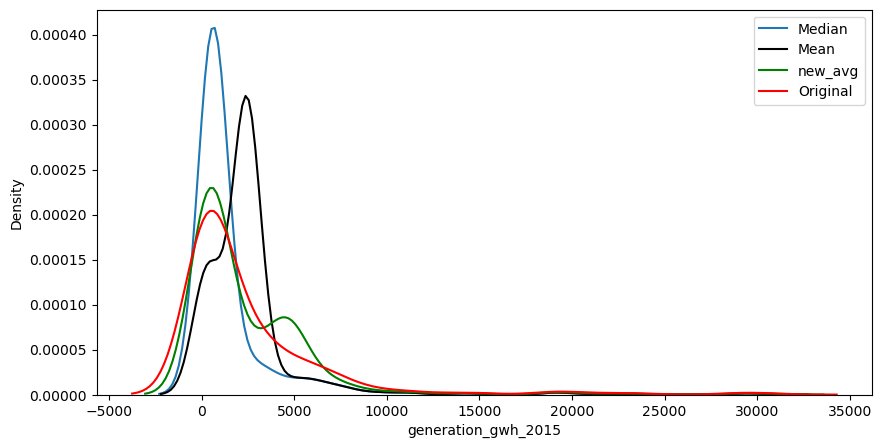

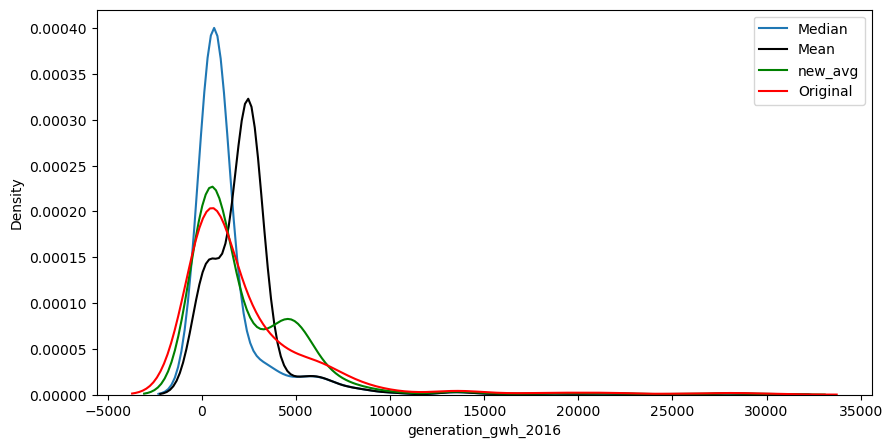

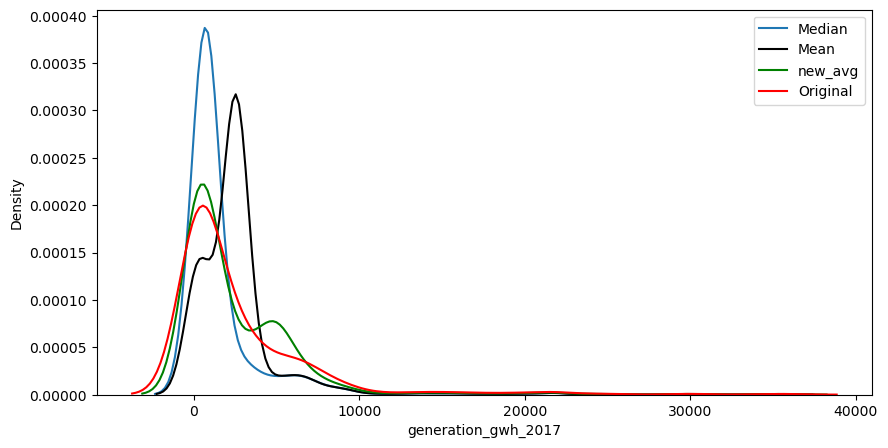

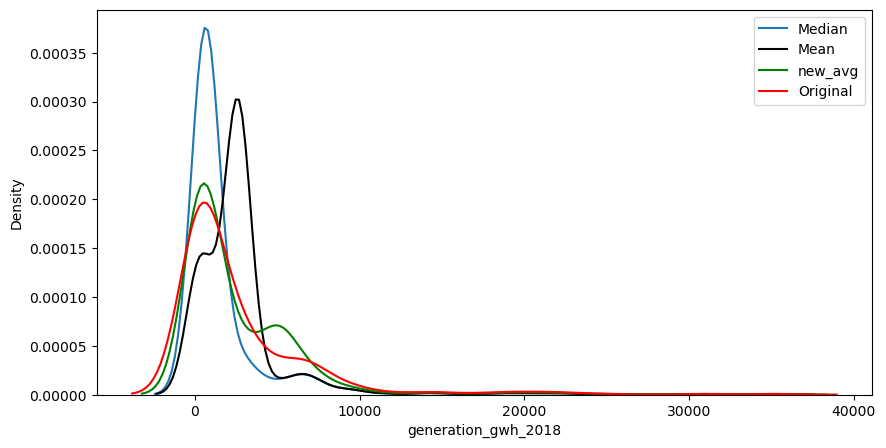

In [39]:
for i in con:
    med= df[i].fillna(df[i].median())
    avg= df[i].fillna(df[i].mean())
    new_avg= df[i].fillna(df.groupby('primary_fuel')[i].transform('mean'))
    
    plt.figure(figsize=(10,5))
    sns.distplot(med, hist=False )
    sns.distplot(avg, hist=False, color='Black' )
    sns.distplot(new_avg, hist=False, color='green' )
    sns.distplot(df[i], hist=False, color='red')
    plt.legend(['Median', 'Mean', 'new_avg', 'Original'])

We can see that in any case the category_wise mean values (green colour) plots the graph very close to the original data and with less distortion.

Filling null values

In [40]:
for i in con:
    df[i]= df[i].fillna(df.groupby('primary_fuel')[i].transform('mean'))

In [41]:
df[con].isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
commissioning_year     173
generation_gwh_2014    300
generation_gwh_2015    300
generation_gwh_2016    300
generation_gwh_2017    300
generation_gwh_2018    300
dtype: int64

In [42]:
for i in con:
    df[i]= df[i].fillna(df[i].mean())

In [43]:
df[con].isnull().sum()

capacity_mw            0
latitude               0
longitude              0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

2. Categorical column

In [49]:
for i in con:
    df[i]= df[i].fillna(df.groupby('primary_fuel')[i].transform('mean'))

In [50]:
for i in cat:
    df[i]= df[i].fillna(df[i].mode()[0])

In [51]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

Null values filled

#### More on understanding columns

In [52]:
df.nunique()

capacity_mw            361
latitude               842
longitude              833
primary_fuel             8
other_fuel1              3
commissioning_year      79
geolocation_source       3
generation_gwh_2014    377
generation_gwh_2015    402
generation_gwh_2016    409
generation_gwh_2017    414
generation_gwh_2018    416
dtype: int64

In [53]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
commissioning_year     float64
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

commissioning_year is float but it should be int

In [126]:
df['commissioning_year']=df['commissioning_year'].astype(int)

In [127]:
df.dtypes

capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
commissioning_year       int32
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [54]:
for i in cat:
    print(i)
    print(df[i].value_counts())
    print()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

other_fuel1
Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

geolocation_source
WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64



column 'other_fuel1' have Oil in 904 rows. this column can be deleted too.

In [56]:
df=df.drop('other_fuel1', axis=1)
df.shape

(907, 11)

Finalising categorical and continuous columns

In [69]:
# continuous variables
con=df.select_dtypes(include= 'number').columns
con

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [70]:
# categorical variables
cat=df.select_dtypes(exclude= 'number').columns
cat

Index(['primary_fuel', 'geolocation_source'], dtype='object')

#### Distribution plot and skewness of continous columns

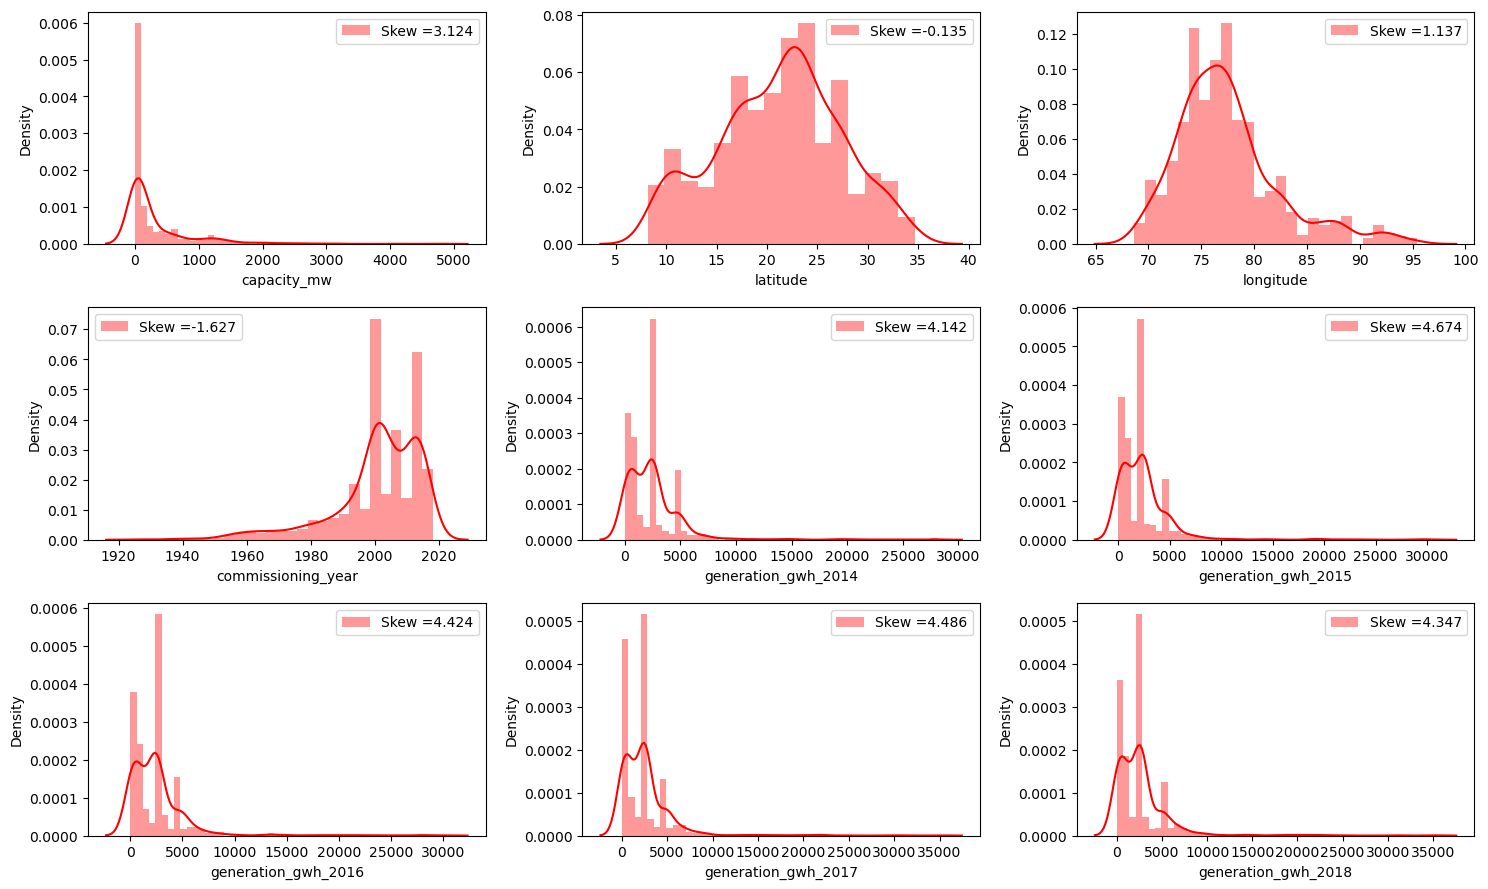

In [71]:
# Distribution plot and skewness
plt.figure(figsize=(15,9))
c=1
for i in con:
    plt.subplot(3,3,c)
    skew= df[i].skew()
    sns.distplot(df[i], color='red', label= 'Skew =%.3f' %skew)
    plt.legend(loc='best')
    c+=1
    
plt.tight_layout()

In [72]:
df[target].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Target is imbalanced where 'Coal' is in majority and is followed by 'Hydro'.

Also it tells us that Coal and hydro are highly used fuels in powerplants.

#### Visualization

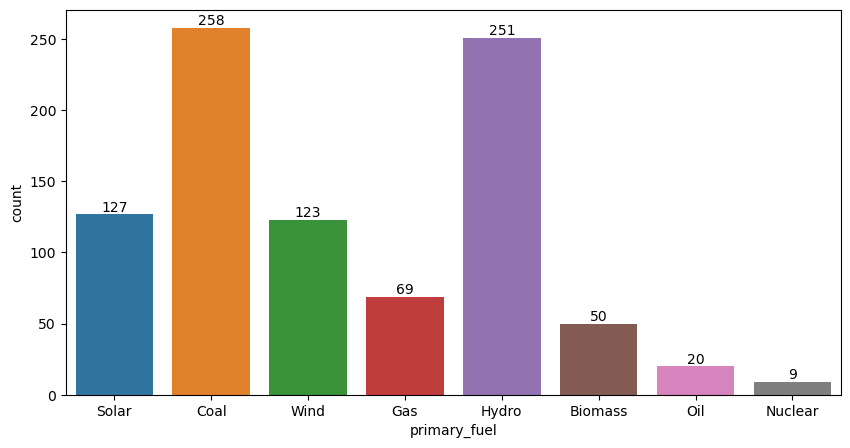

In [73]:
# target variable
plt.figure(figsize=(10,5))
ax= sns.countplot(x=df[target], data=df)
plt.bar_label(ax.containers[0])
plt.show()

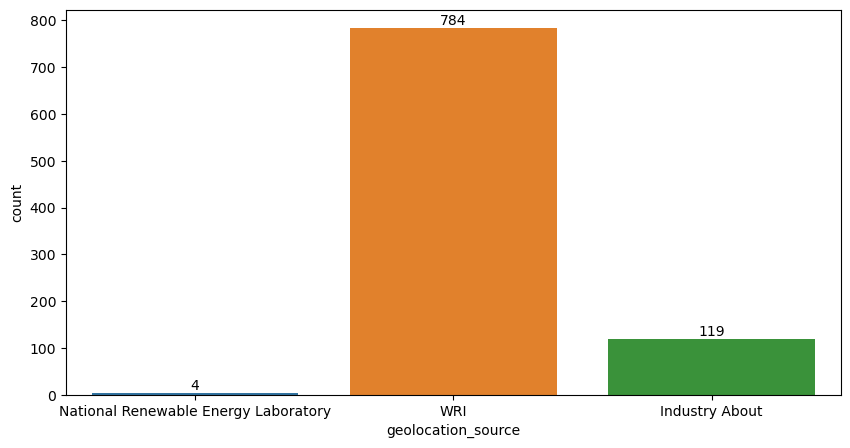

In [74]:
# categorical columns
for i in df[cat[1:]]:
    plt.figure(figsize=(10,5))
    ax= sns.countplot(x=i, data=df)
    plt.bar_label(ax.containers[0])

In [75]:
df[con].nunique()

capacity_mw            361
latitude               842
longitude              833
commissioning_year      79
generation_gwh_2014    377
generation_gwh_2015    402
generation_gwh_2016    409
generation_gwh_2017    414
generation_gwh_2018    416
dtype: int64

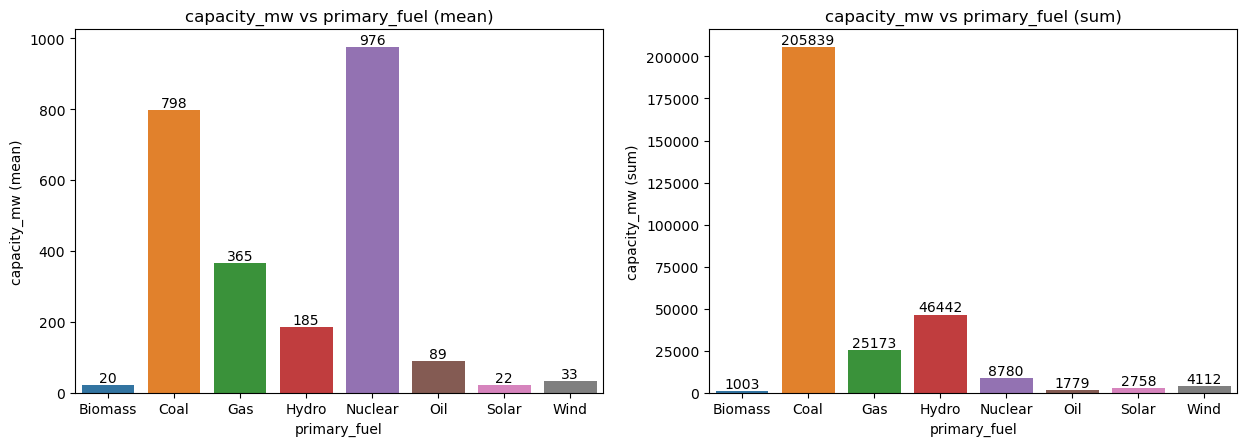

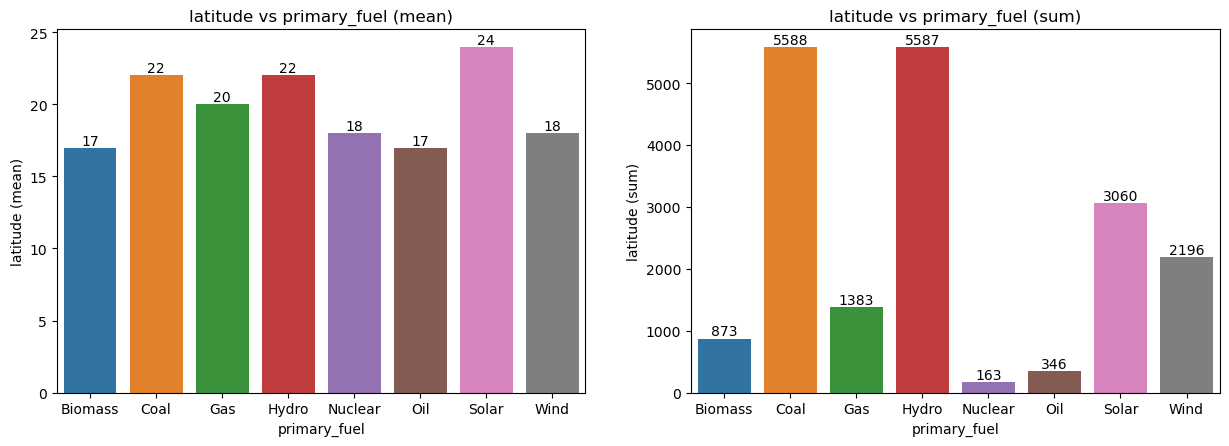

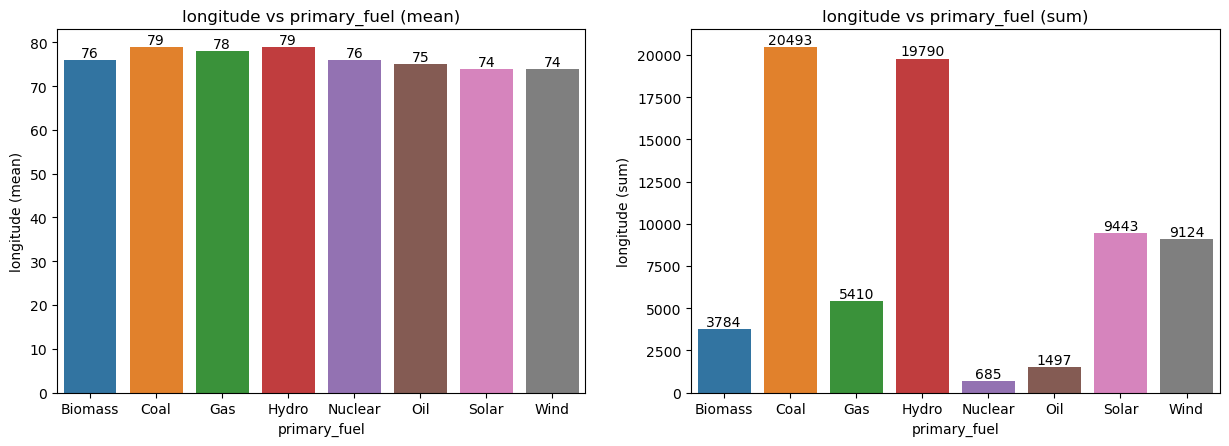

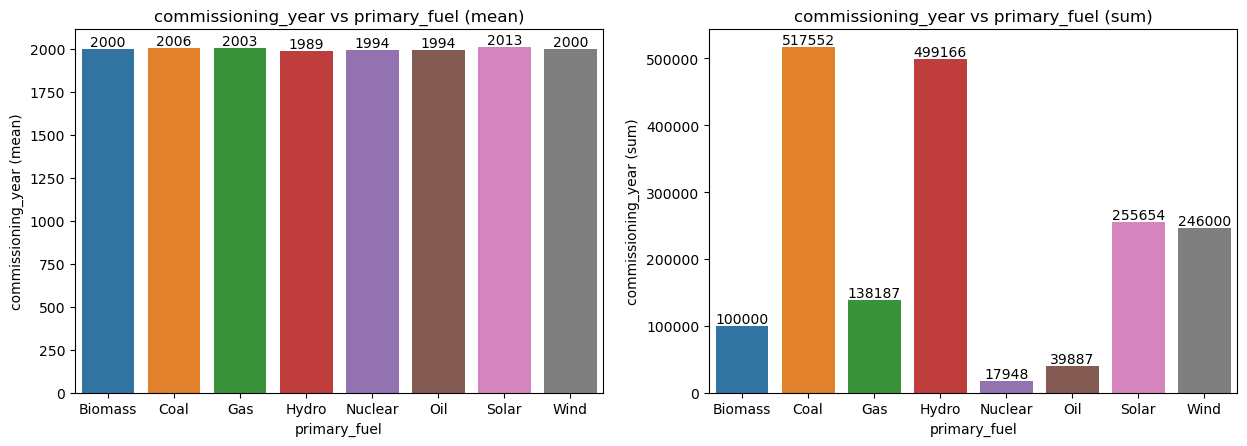

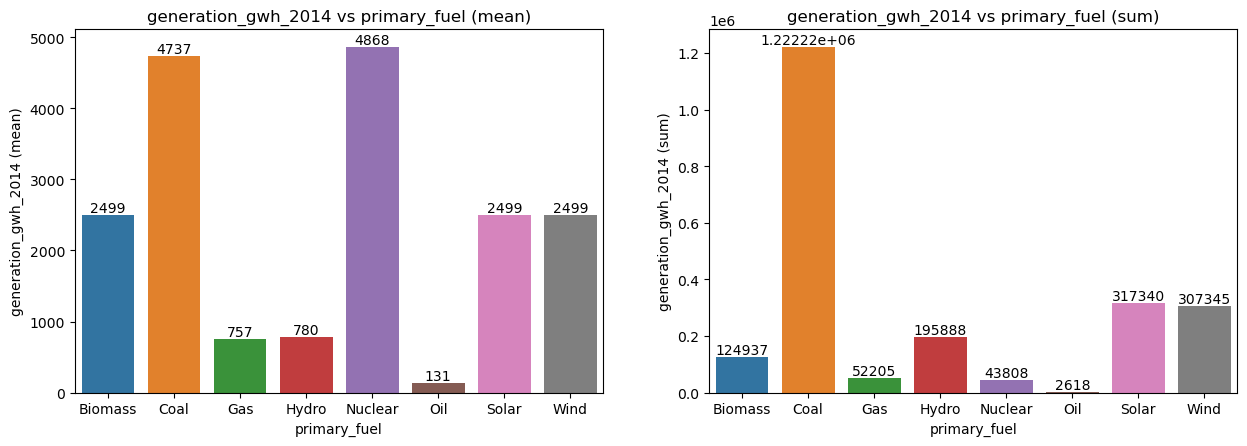

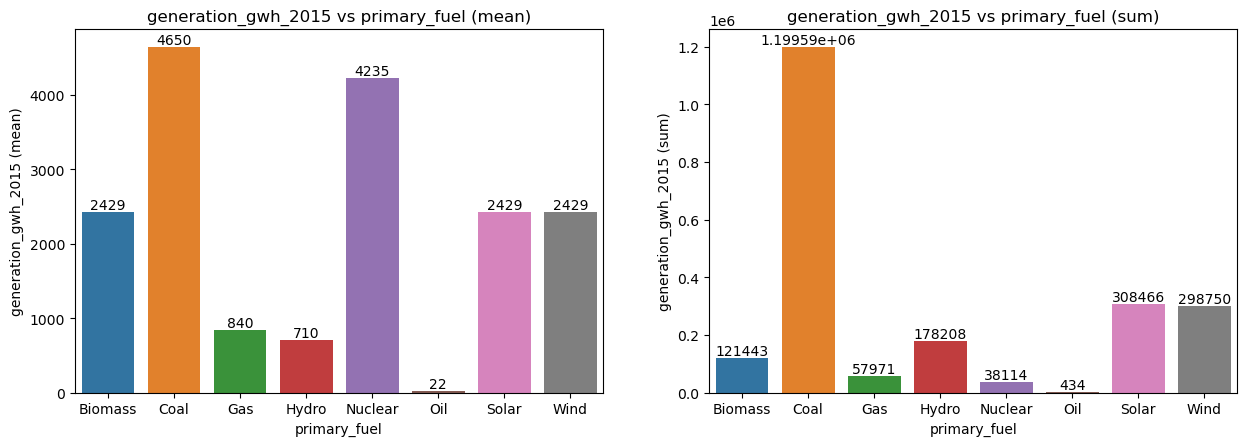

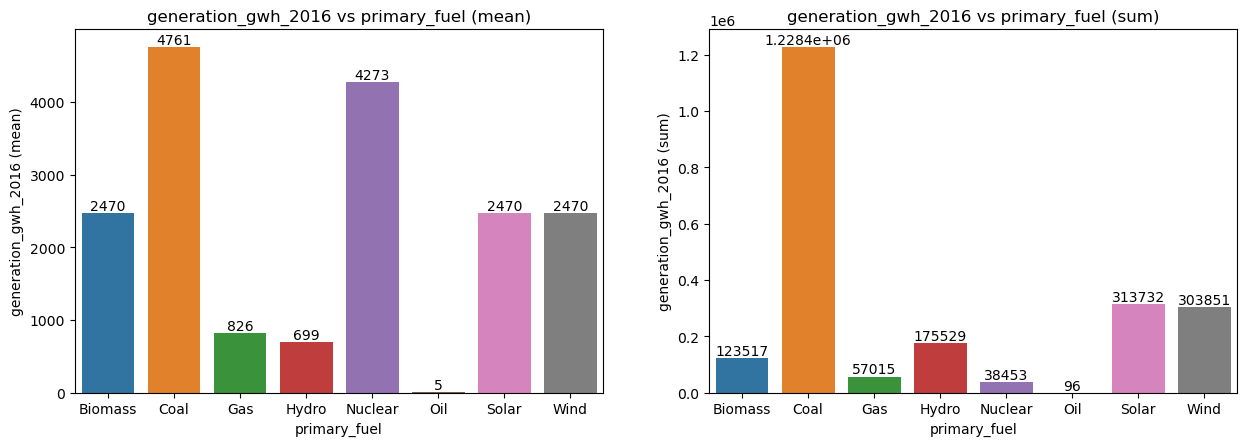

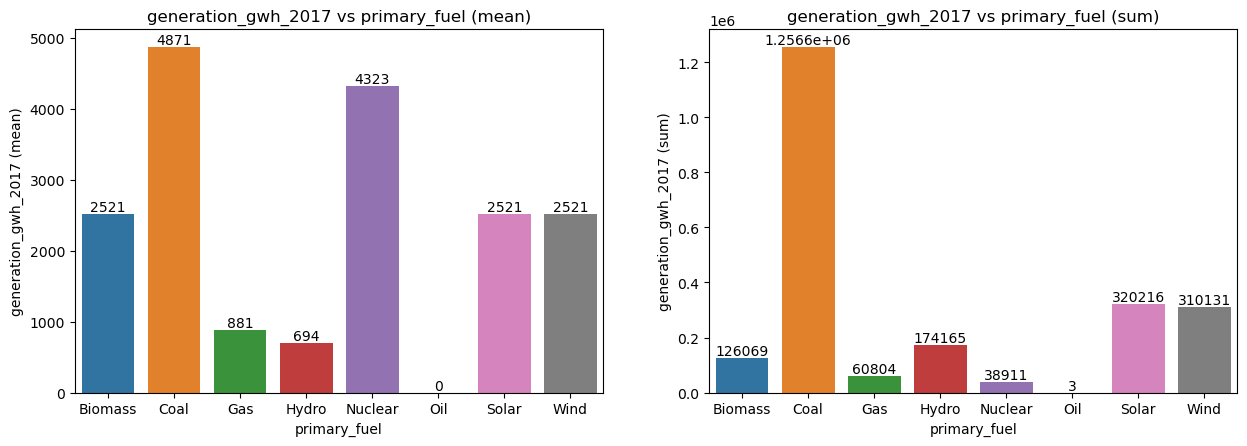

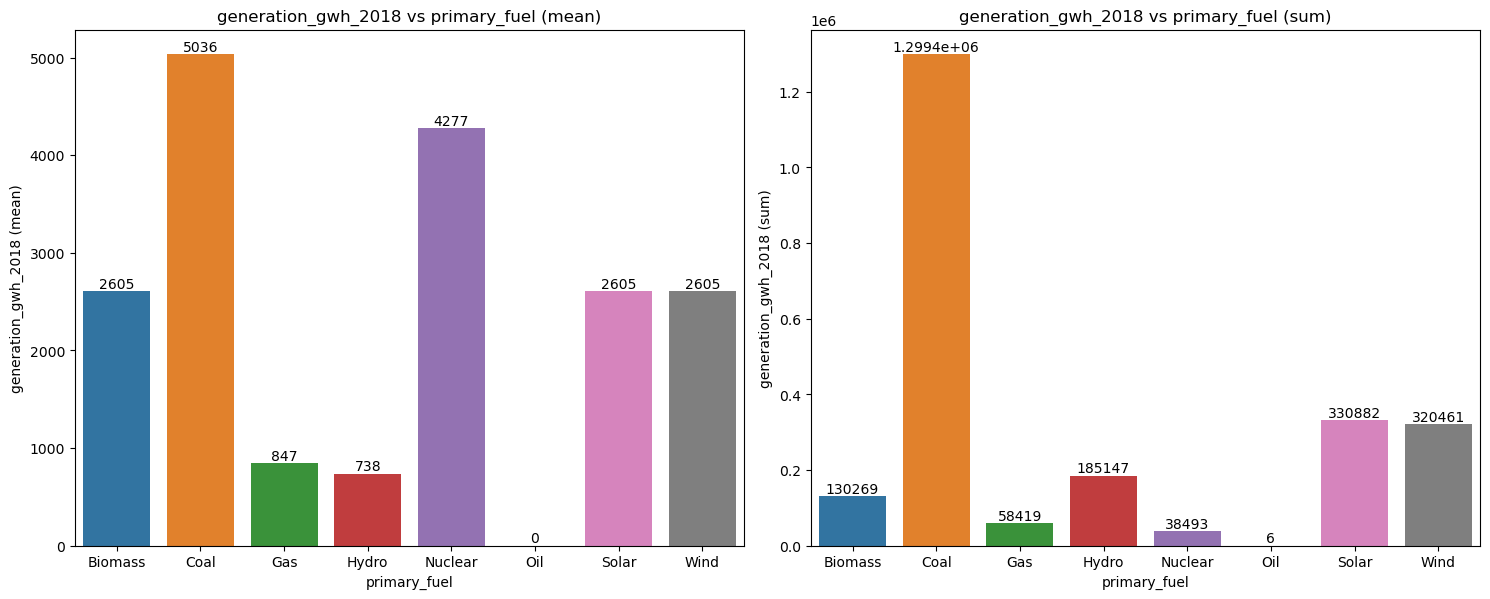

In [144]:
c=1
for i in con[:]:
    m=round(df.groupby(target)[i].mean(),0)
    n=round(df.groupby(target)[i].sum(),0)
    plt.figure(figsize=(15,50))
    
    plt.subplot(9,2,c)
    ax=sns.barplot(x=m.index, y=m.values)
    plt.ylabel(i+' (mean)')
    plt.bar_label(ax.containers[0])
    plt.title(i+" vs "+target+ " (mean)")
    c+=1
    
    plt.subplot(9,2,c)
    ax=sns.barplot(x=n.index, y=n.values)
    plt.ylabel(i+' (sum)')
    plt.bar_label(ax.containers[0])
    plt.title(i+" vs "+target+ " (sum)")
    c+=1
    
plt.tight_layout()

Capacity_mw- Mean Nuclear capacity is largest, followed by coal whereas total capacity by coal is larger.


commissioning_year- Hydro is oldest where as Solar is newest.


generation-
In 2014 Mean geneartion with Nuclear is largest whereas for remaining years coal is largest.
Total generation in any year is largest for coal.

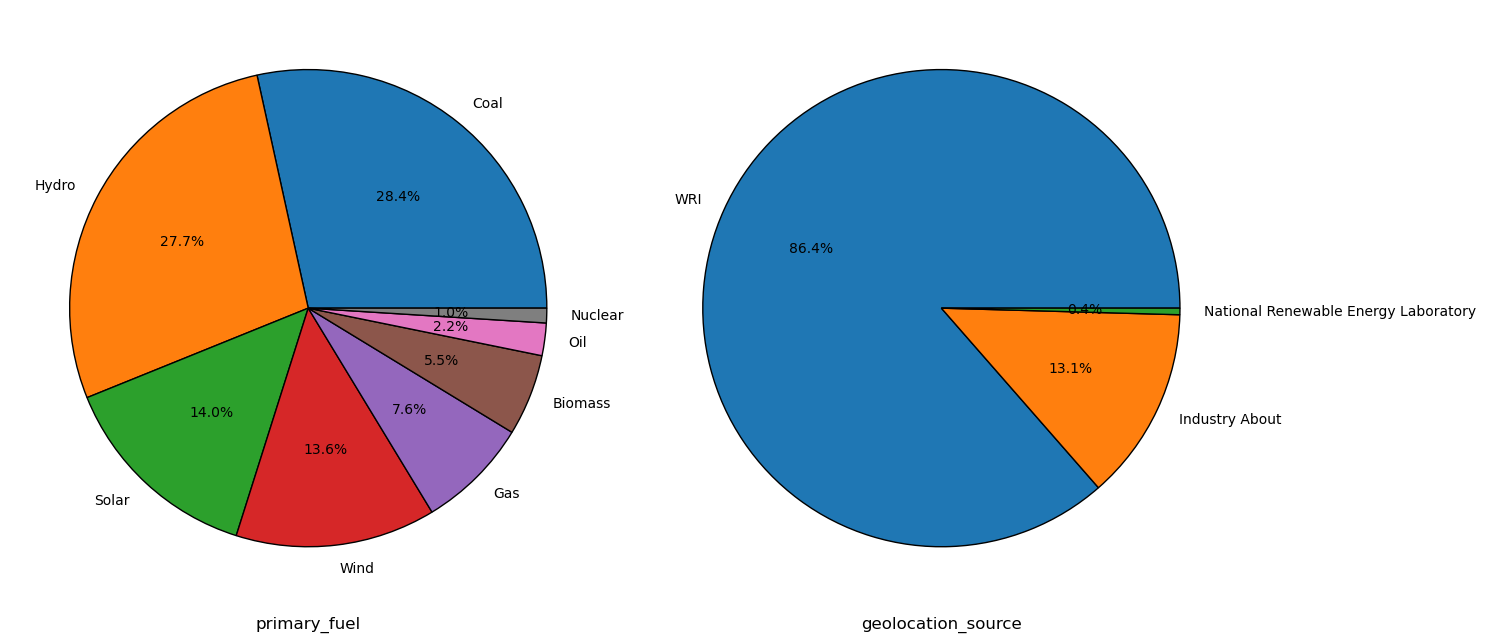

In [85]:
plt.figure(figsize=(15,10))
c=1
for i in df:
    if (df[i].nunique()<=10):
        plt.subplot(1,2,c)
        df[i].value_counts().plot.pie(autopct='%1.1f%%', wedgeprops = {"edgecolor" : "Black",'linewidth':1})
        plt.xlabel(i, size=12)
        plt.ylabel("")


        c+=1
plt.tight_layout()

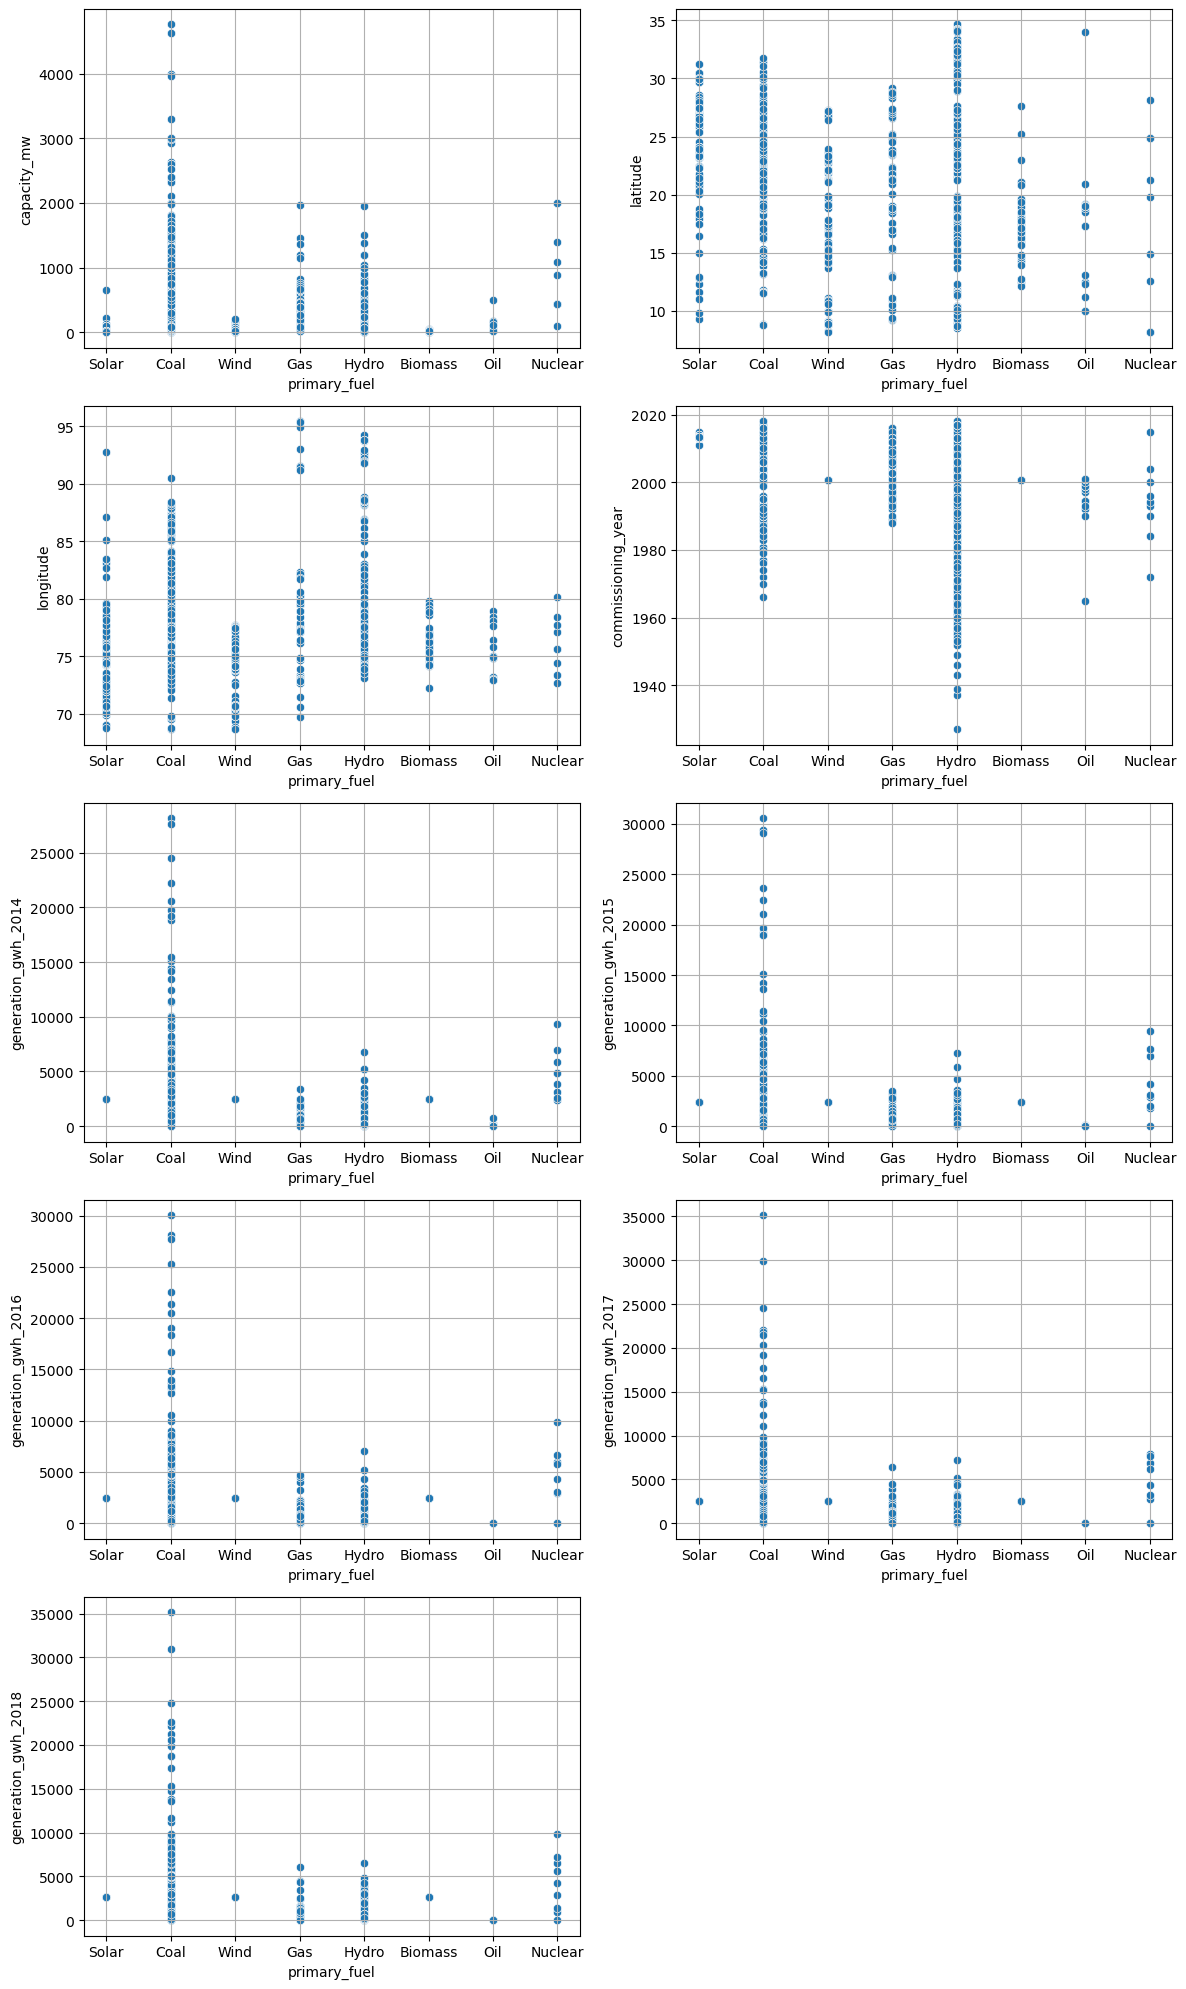

In [94]:
plt.figure(figsize=(12,20))
c=1
for i in con[:]:
    plt.subplot(5,2,c)
    ax=sns.scatterplot(y=df[i],x=df[target])
    c+=1
    plt.grid()
plt.tight_layout()

Generally, coal plant have very high capacity and can go above 4500MW capacity, where as for other fuels, the capacity is upto 2000MW.

latitude and longitude don't have very clear indication.

Before 1960, 'Hydro' was the only source of primary fuel for power generation and later on Plants based on other fuels were commissioned.

In any year, Power generated by coal plants are huge comared to anyother plant running on any other fuel.

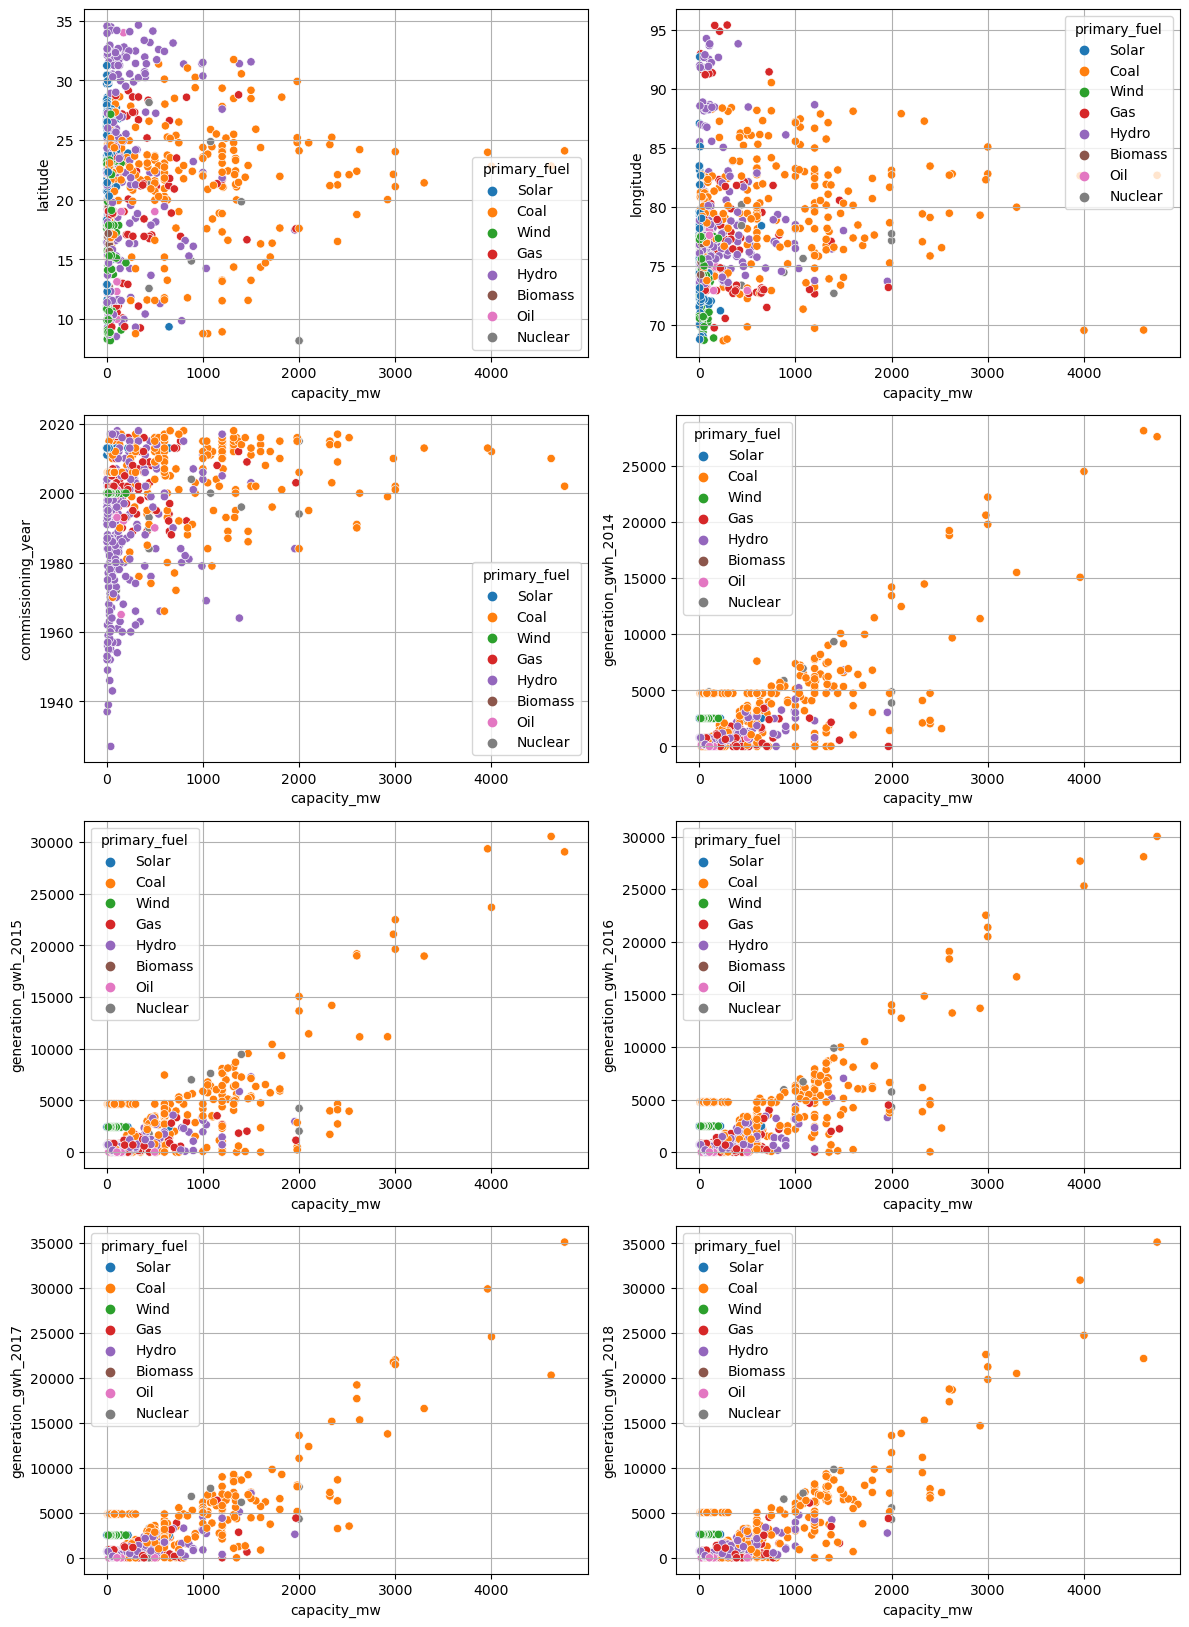

In [147]:
plt.figure(figsize=(12,20))
c=1
for i in con[1:]:
    plt.subplot(5,2,c)
    ax=sns.scatterplot(y=df[i],x=df['capacity_mw'], hue=df[target])
    c+=1
    plt.grid()
plt.tight_layout()

Plants which are commissioned in the recent years have high capacity.

capacity and power generation have positive relation in any year.

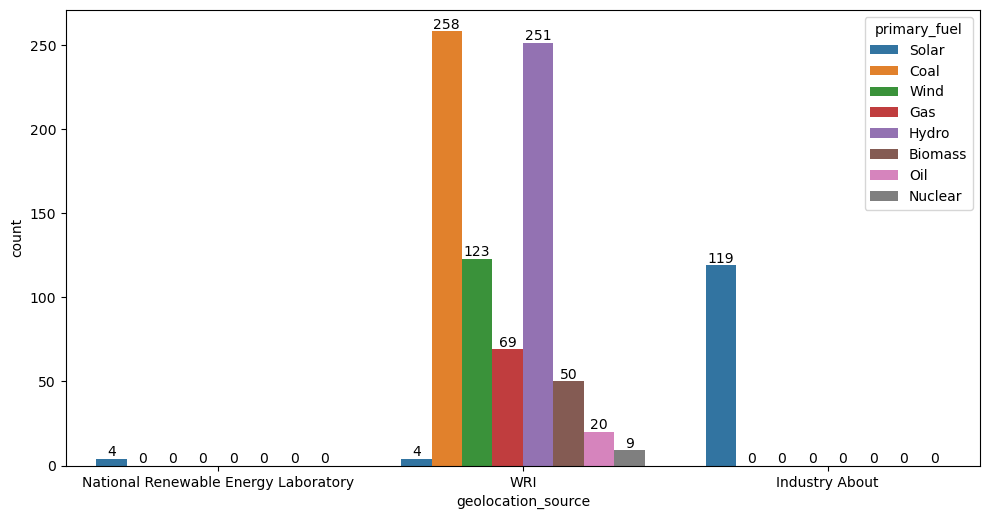

In [101]:
plt.figure(figsize=(10,10))
c=1
for i in cat[1:]:
    plt.subplot(2,1,c)
    ax= sns.countplot(x=df[i], data=df, hue= target)
    for j in range (8):
        plt.bar_label(ax.containers[j])
    c+=1
plt.tight_layout()

geolocation_source for 'Solar' is majorly from Industry About.

'National Renewable Energy Laboratory' and 'Industry About' have information only about plants running on Solar.

'WRI' have majority of the information.

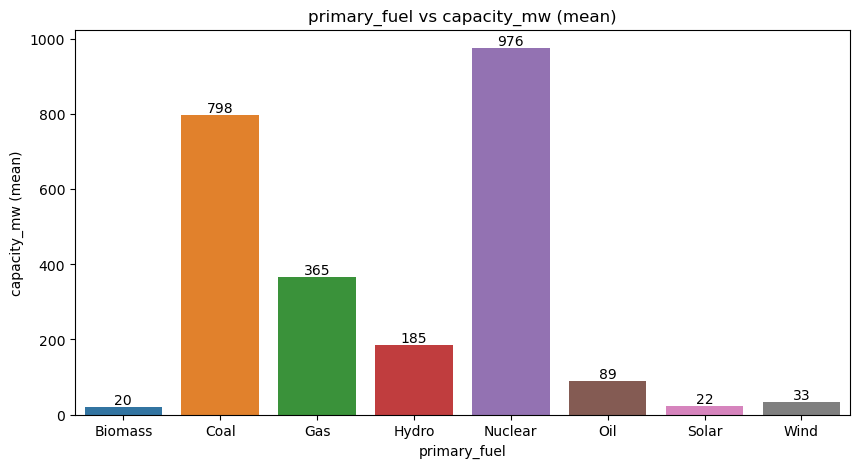

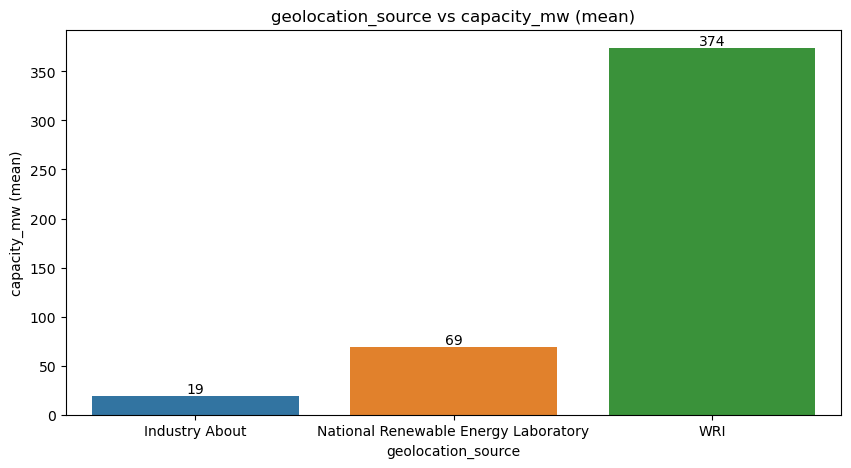

In [157]:
for i in cat:
    m=round(df.groupby(i)['capacity_mw'].mean(),0)
    plt.figure(figsize=(10,5))
    ax=sns.barplot(x=m.index, y=m.values)
    plt.ylabel('capacity_mw (mean)')
    plt.bar_label(ax.containers[0])
    plt.title(i+" vs capacity_mw (mean)")

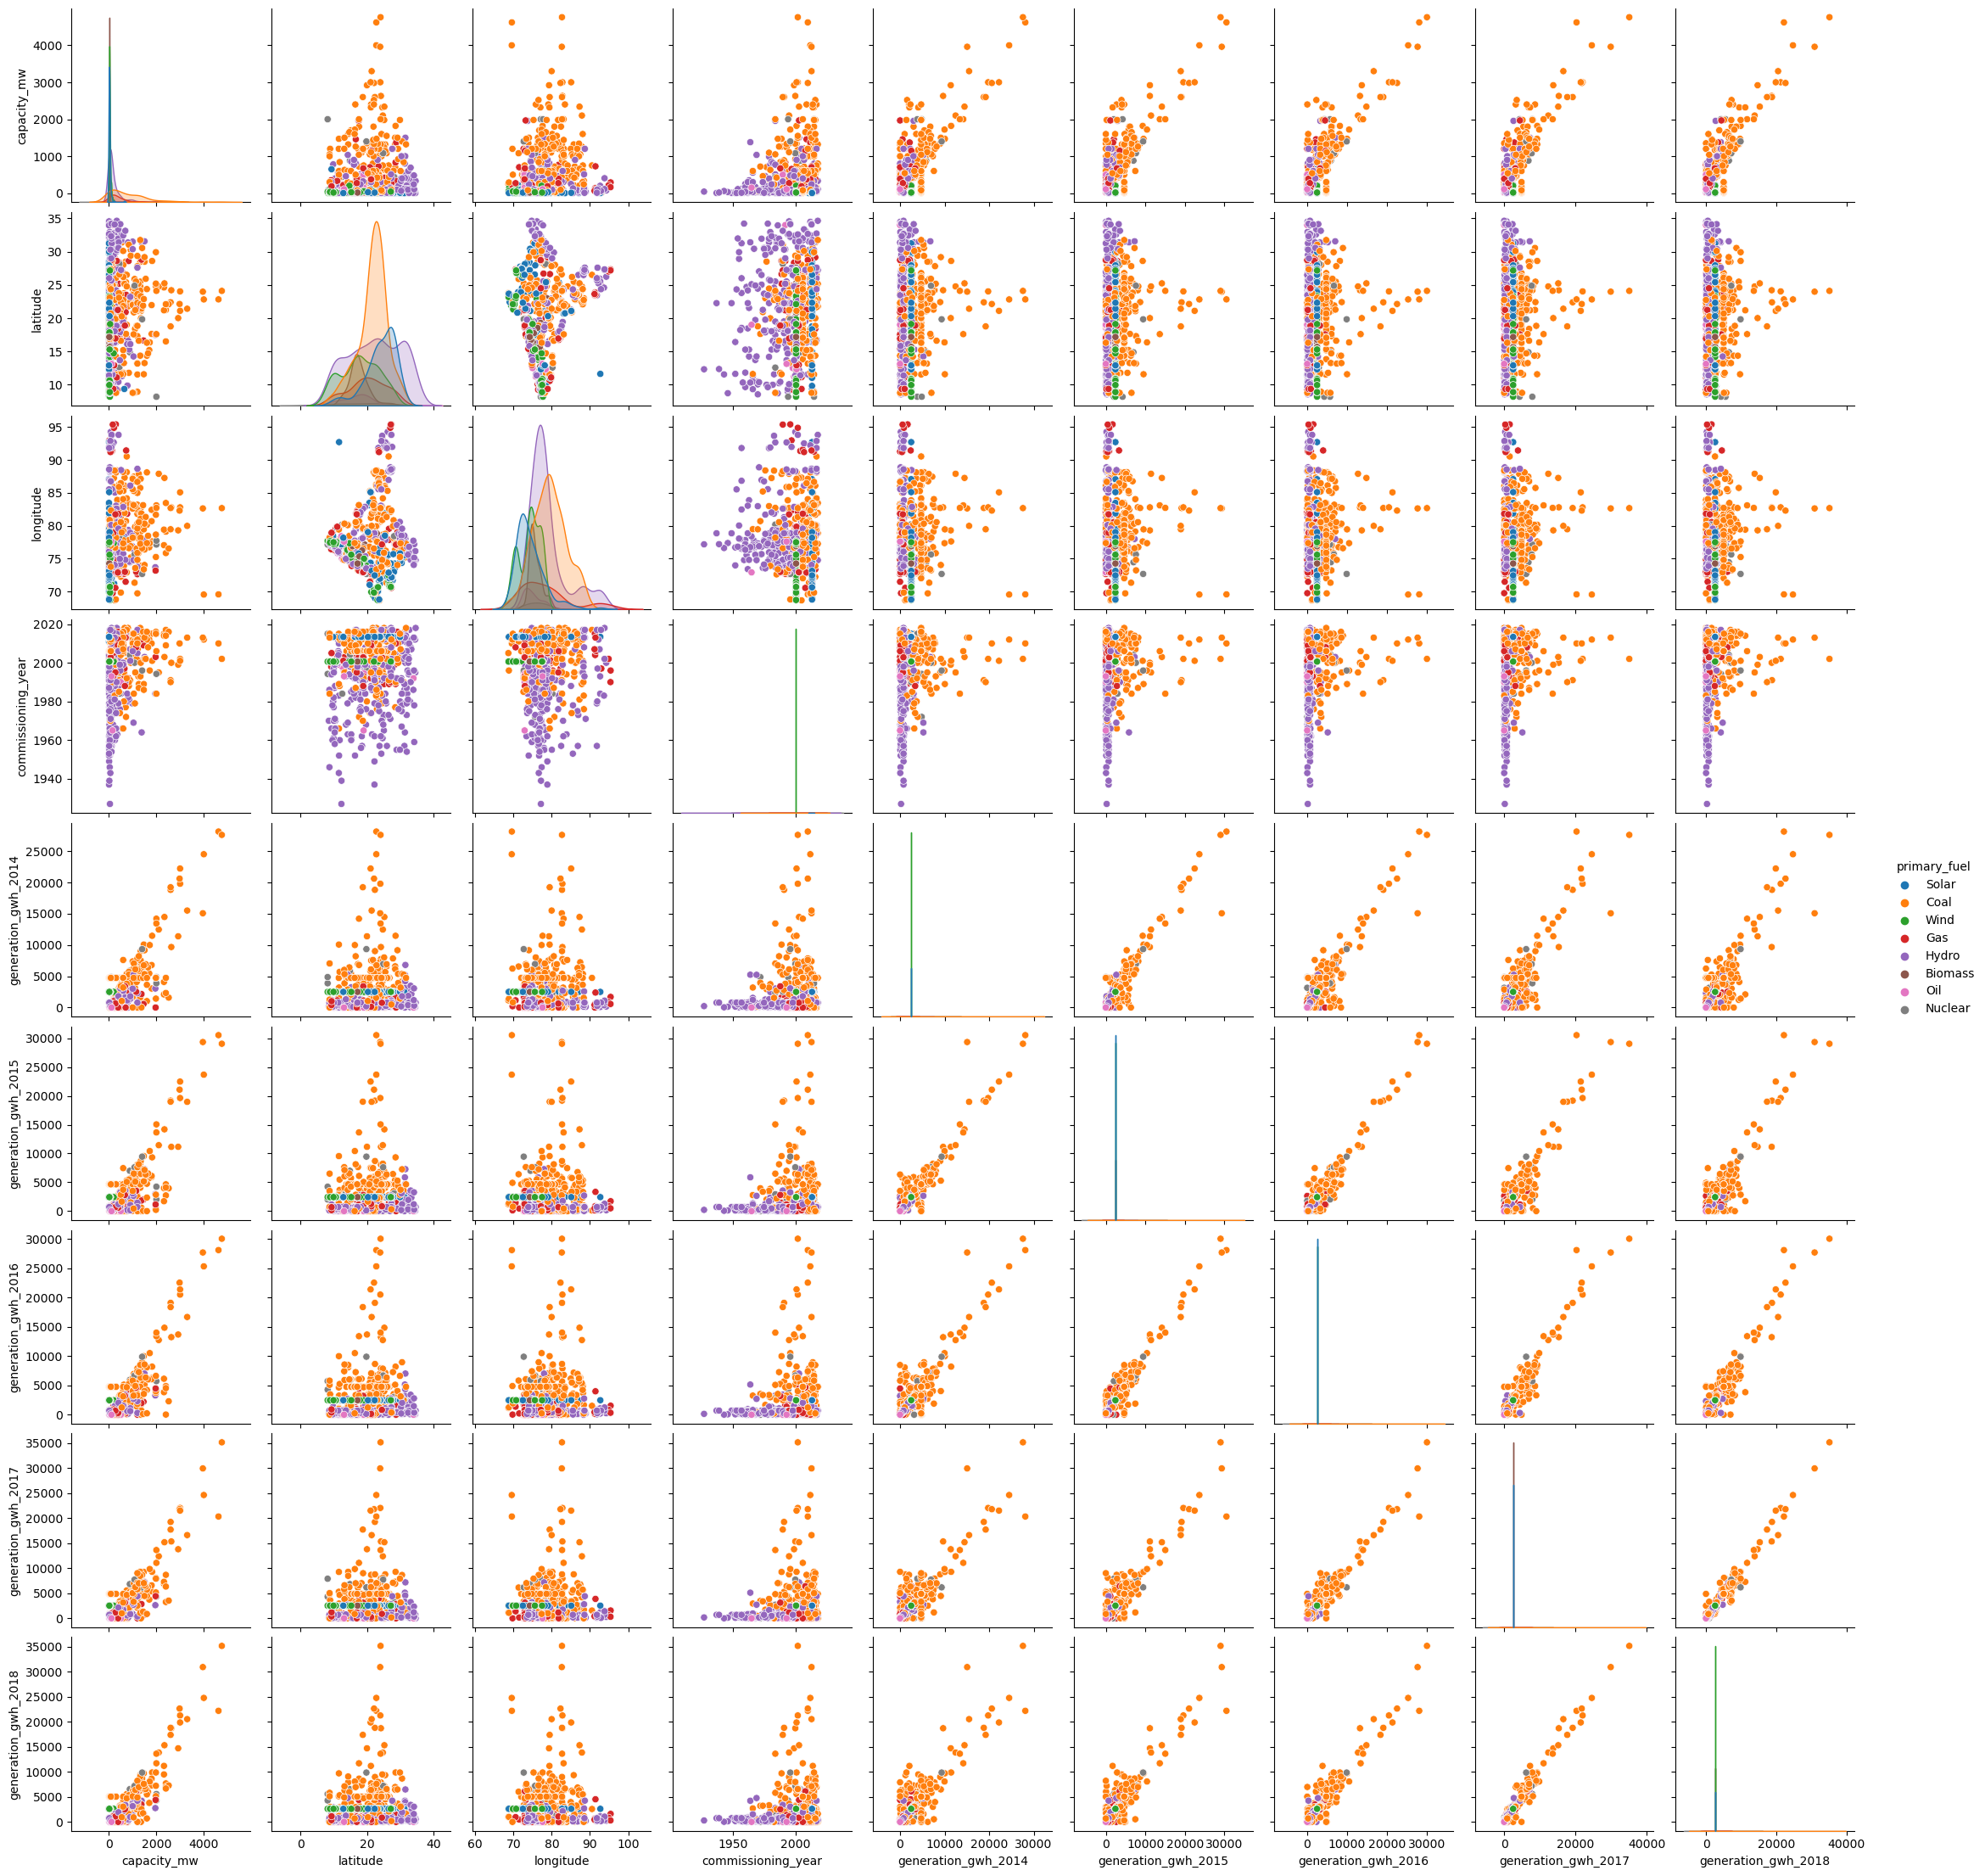

In [110]:
sns.pairplot(df, hue = target)

#### Correlation

In [111]:
# correlation of features with target
df.corr()

capacity_mw  latitude  longitude  commissioning_year  \
capacity_mw             1.000000  0.053721   0.199178            0.127139   
latitude                0.053721  1.000000   0.042995            0.139455   
longitude               0.199178  0.042995   1.000000           -0.047118   
commissioning_year      0.127139  0.139455  -0.047118            1.000000   
generation_gwh_2014     0.681633  0.045905   0.008699            0.197203   
generation_gwh_2015     0.695703  0.038297   0.010944            0.196301   
generation_gwh_2016     0.721520  0.035918   0.031374            0.218849   
generation_gwh_2017     0.735477  0.044341   0.035801            0.221921   
generation_gwh_2018     0.747450  0.039189   0.033780            0.223021   

                     generation_gwh_2014  generation_gwh_2015  \
capacity_mw                     0.681633             0.695703   
latitude                        0.045905             0.038297   
longitude                       0.008699             0.010944   
commissioning_year              0.197203             0.196301   
generation_gwh_2014             1.000000             0.943371   
generation_gwh_2015             0.943371             1.000000   
generation_gwh_2016             0.923992             0.971335   
generation_gwh_2017             0.897397             0.932508   
generation_gwh_2018             0.889376             0.926584   

                     generation_gwh_2016  generation_gwh_2017  \
capacity_mw                     0.721520             0.735477   
latitude                        0.035918             0.044341   
longitude                       0.031374             0.035801   
commissioning_year              0.218849             0.221921   
generation_gwh_2014             0.923992             0.897397   
generation_gwh_2015             0.971335             0.932508   
generation_gwh_2016             1.000000             0.965492   
generation_gwh_2017             0.965492             1.000000   
generation_gwh_2018             0.955782             0.985594   

                     generation_gwh_2018  
capacity_mw                     0.747450  
latitude                        0.039189  
longitude                       0.033780  
commissioning_year              0.223021  
generation_gwh_2014             0.889376  
generation_gwh_2015             0.926584  
generation_gwh_2016             0.955782  
generation_gwh_2017             0.985594  
generation_gwh_2018             1.000000

Few of the columns are highly correlated.

Let's plot heatmap.

<AxesSubplot: >

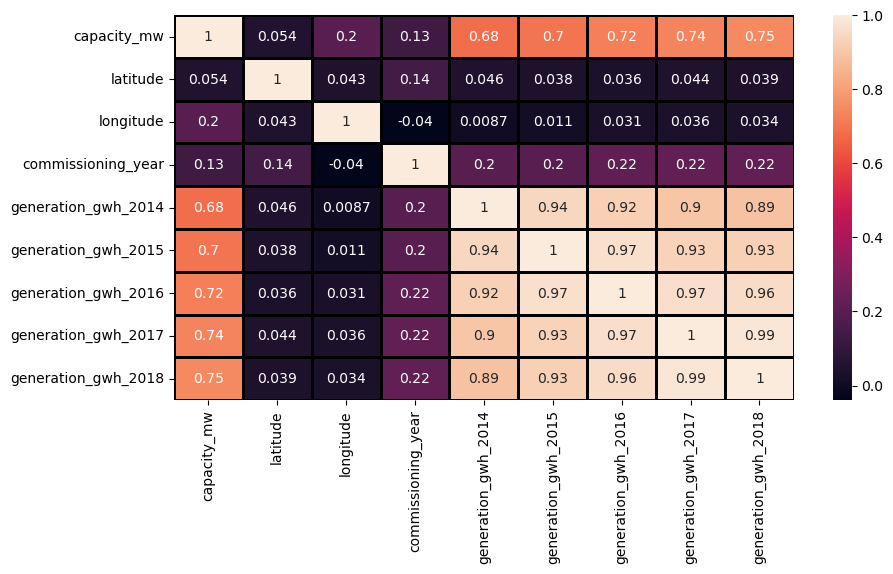

In [146]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, linewidth=2, linecolor='Black')

generations are high correlated to each other and also they are correlated to capacity_mw.



#### Boxplot and outliers

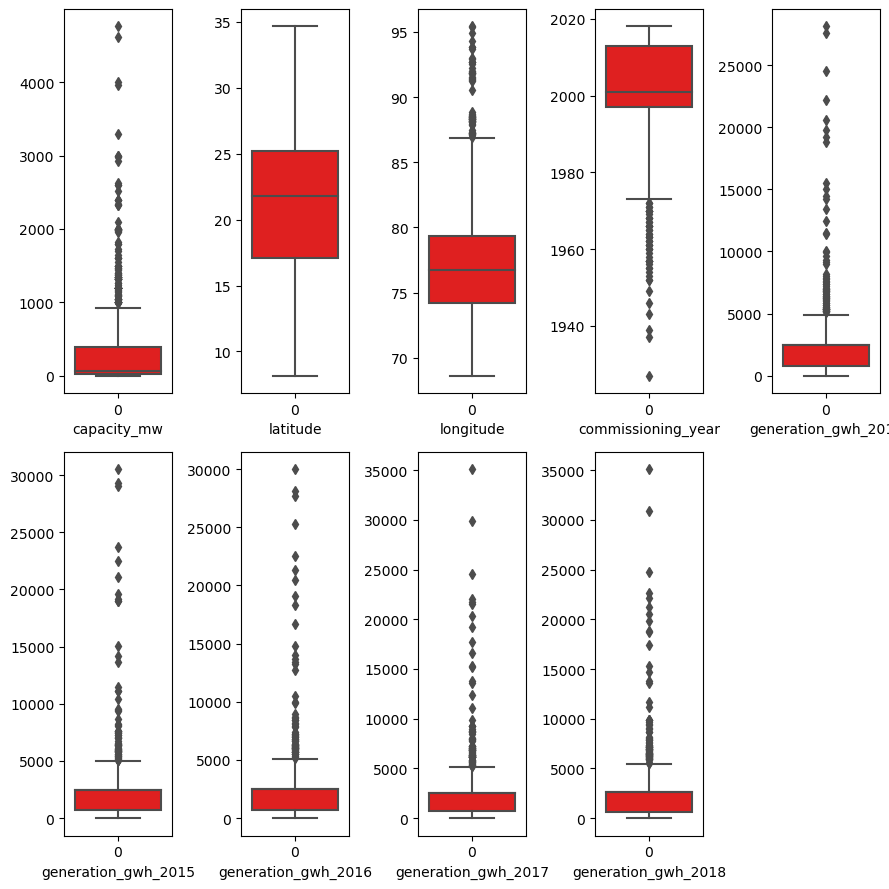

In [160]:
# Boxplot
plt.figure(figsize=(9,9))
c=1 
for i in con:
    plt.subplot(2,5,c)
    sns.boxplot(df[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

There are outliers in the dataset. 

In [217]:
# index of outliers by iqr
ind=[]
for i in con:
    IQR= df[i].quantile(0.75) - df[i].quantile(0.25)
    upper= df[i].quantile(0.75) + (IQR * 1.5)
    lower= df[i].quantile(0.25) - (IQR * 1.5)
    
    ind.append(df[df[i]>upper].index)
    ind.append(df[df[i]<lower].index)
    
no=[j for i in range (len(ind)) for j in ind[i]]    #getting all elements from nested 'ind' list

# there are possibilities that several indexes are repeated in the list.
len(set(no))

218

In [218]:
#zscore
from scipy.stats import zscore

z = zscore(df[con])
t=np.abs(z)
# taking thresold value = 3

df2 = df[(t<3).all(axis = 1)]
df2.shape

(850, 11)

In [219]:
#Percentage of data loss
l=df.shape[0]-df2.shape[0]
print("By IQR, the percent of data loss is {0}".format(len(set(no))/df.shape[0]*100))
print()
print("By z-score, the percent of data loss is {0}".format(l/df.shape[0]*100))

By IQR, the percent of data loss is 24.035281146637267

By z-score, the percent of data loss is 6.284454244762955


##### The data loss by z-score is less compared to IQR method which is 6.28%.

In [220]:
df2=df2.reset_index(drop=True)

In [221]:
df2

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar                2011   
1           98.0   24.7663    74.6090         Coal                2006   
2           39.2   21.9038    69.3732         Wind                2000   
3          135.0   23.8712    91.3602          Gas                2004   
4         1800.0   21.9603    82.4091         Coal                2015   
..           ...       ...        ...          ...                 ...   
845       1600.0   16.2949    77.3568         Coal                2016   
846          3.0   12.8932    78.1654        Solar                2013   
847         25.5   15.2758    75.5811         Wind                2000   
848         80.0   24.3500    73.7477         Coal                2006   
849         16.5    9.9344    77.4768         Wind                2000   

                       geolocation_source  generation_gwh_2014  \
0    National Renewable Energy Laboratory          2498.743142   
1                                     WRI          4737.279310   
2                                     WRI          2498.743142   
3                                     WRI           617.789264   
4                                     WRI          3035.550000   
..                                    ...                  ...   
845                                   WRI          4737.279310   
846                        Industry About          2498.743142   
847                                   WRI          2498.743142   
848                                   WRI          4737.279310   
849                                   WRI          2498.743142   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2428.863290          2470.332276          2521.386641   
1            4649.585751          4761.233946          4870.537285   
2            2428.863290          2470.332276          2521.386641   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
845             0.994875           233.596650           865.400000   
846          2428.863290          2470.332276          2521.386641   
847          2428.863290          2470.332276          2521.386641   
848          4649.585751          4761.233946          4870.537285   
849          2428.863290          2470.332276          2521.386641   

     generation_gwh_2018  
0            2605.373790  
1            5036.420635  
2            2605.373790  
3             626.239128  
4            7279.000000  
..                   ...  
845           686.500000  
846          2605.373790  
847          2605.373790  
848          5036.420635  
849          2605.373790  

[850 rows x 11 columns]

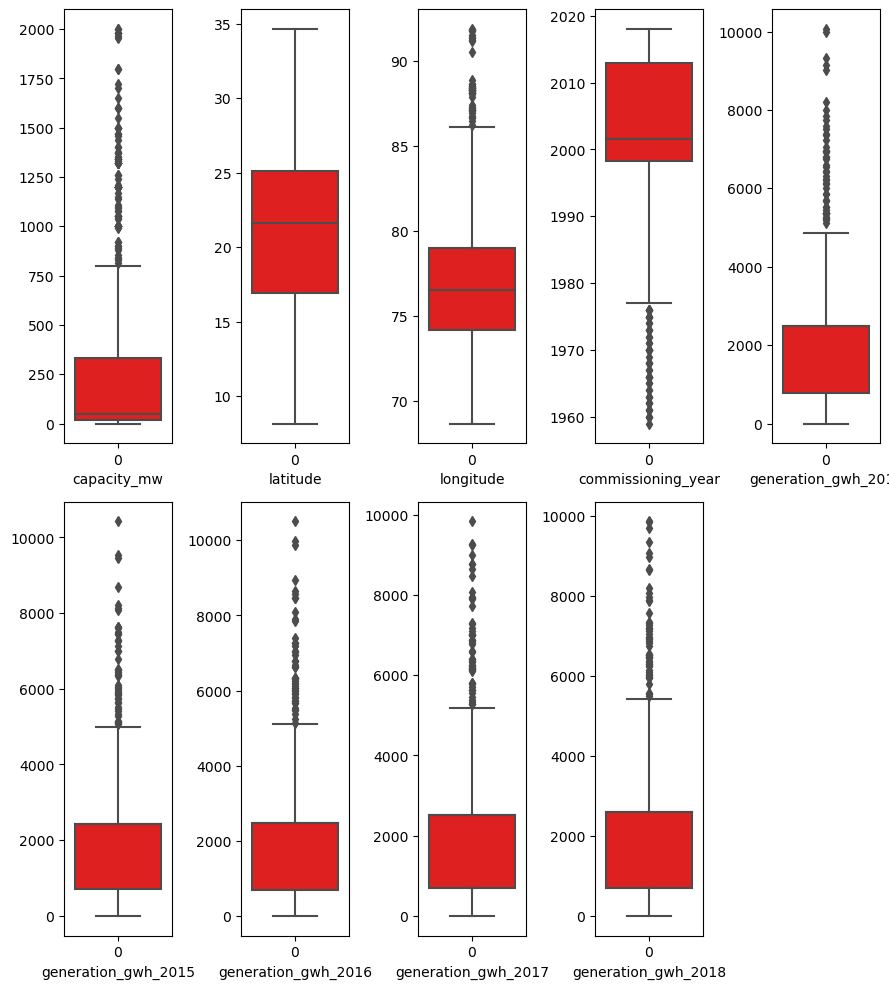

In [222]:
# Boxplot after zscore
plt.figure(figsize=(9,10))
c=1 
for i in con:
    plt.subplot(2,5,c)
    sns.boxplot(df2[i], orient='v', color= 'red')
    plt.xlabel(i)
    c+=1
    
plt.tight_layout()

#### Encoding

In [223]:
df2[cat].nunique()

primary_fuel          8
geolocation_source    3
dtype: int64

We will use label encoding.

In [226]:
df2.shape

(850, 11)

In [227]:
df2.head()

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407        Solar                2011   
1         98.0   24.7663    74.6090         Coal                2006   
2         39.2   21.9038    69.3732         Wind                2000   
3        135.0   23.8712    91.3602          Gas                2004   
4       1800.0   21.9603    82.4091         Coal                2015   

                     geolocation_source  generation_gwh_2014  \
0  National Renewable Energy Laboratory          2498.743142   
1                                   WRI          4737.279310   
2                                   WRI          2498.743142   
3                                   WRI           617.789264   
4                                   WRI          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0          2428.863290          2470.332276          2521.386641   
1          4649.585751          4761.233946          4870.537285   
2          2428.863290          2470.332276          2521.386641   
3           843.747000           886.004428           663.774500   
4          5916.370000          6243.000000          5385.579736   

   generation_gwh_2018  
0          2605.373790  
1          5036.420635  
2          2605.373790  
3           626.239128  
4          7279.000000

In [231]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2[target]= le.fit_transform(df2[target]) 
df2['geolocation_source']= le.fit_transform(df2['geolocation_source'])
print("Done")

Done


In [232]:
df2.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6                2011   
1         98.0   24.7663    74.6090             1                2006   
2         39.2   21.9038    69.3732             7                2000   
3        135.0   23.8712    91.3602             2                2004   
4       1800.0   21.9603    82.4091             1                2015   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1          2498.743142          2428.863290   
1                   2          4737.279310          4649.585751   
2                   2          2498.743142          2428.863290   
3                   2           617.789264           843.747000   
4                   2          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0          2470.332276          2521.386641          2605.373790  
1          4761.233946          4870.537285          5036.420635  
2          2470.332276          2521.386641          2605.373790  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [233]:
df2[target]

0      6
1      1
2      7
3      2
4      1
      ..
845    1
846    6
847    7
848    1
849    7
Name: primary_fuel, Length: 850, dtype: int32

#### Splitting features and target variable

In [241]:
x= df2.drop(target, axis=1)
y=df2[target]

print(x.shape, y.shape)

(850, 10) (850,)


#### Collinearity and Multicollinearity

<AxesSubplot: >

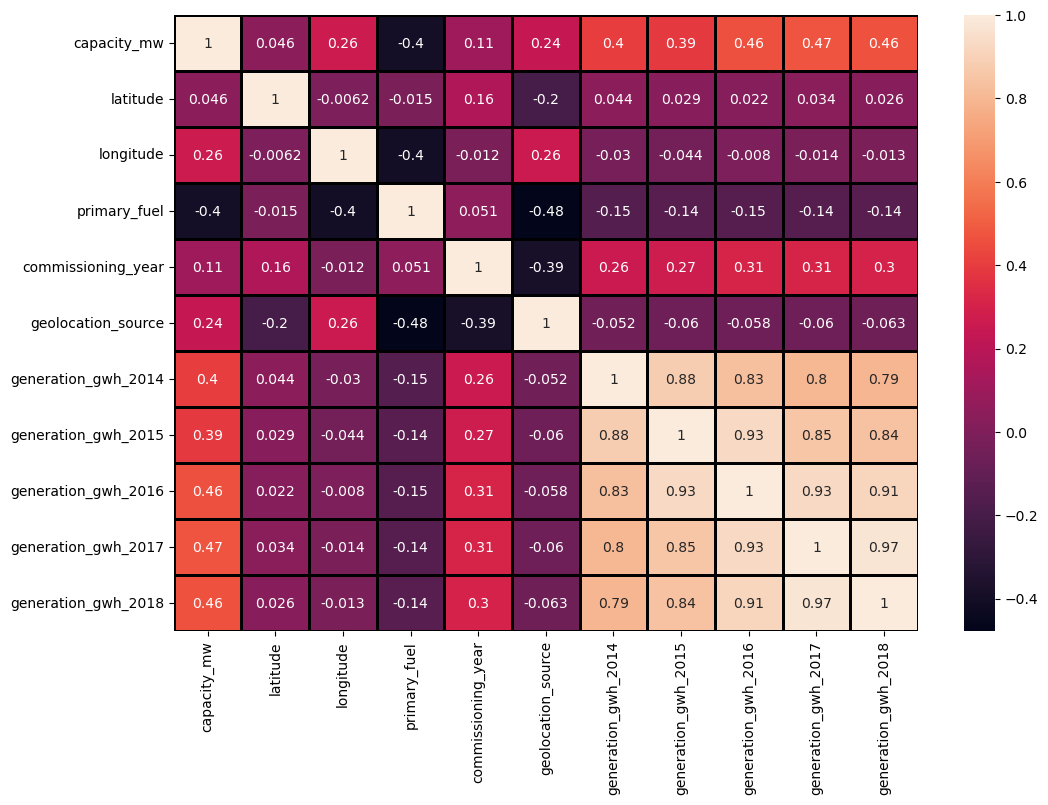

In [242]:
plt.figure(figsize=(12,8))
sns.heatmap(df2.corr(), annot=True, linecolor='Black', linewidth=2)

In [243]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [244]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [245]:
vif_(x)

              Features         VIF
0          capacity_mw    2.169355
1             latitude   13.628318
2            longitude  362.619231
3   commissioning_year  364.160669
4   geolocation_source    8.654127
5  generation_gwh_2014   12.449318
6  generation_gwh_2015   27.065850
7  generation_gwh_2016   36.878319
8  generation_gwh_2017   52.235817
9  generation_gwh_2018   45.286533


VIF score of few column is very high.

In [246]:
#dropping commissioning_year
x=x.drop('commissioning_year', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0          capacity_mw   1.997139
1             latitude  13.109887
2            longitude  26.471874
3   geolocation_source   8.640850
4  generation_gwh_2014  12.442690
5  generation_gwh_2015  26.992240
6  generation_gwh_2016  36.840520
7  generation_gwh_2017  52.193733
8  generation_gwh_2018  45.275307


In [247]:
#dropping generation_gwh_2017
x=x.drop('generation_gwh_2017', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0          capacity_mw   1.993463
1             latitude  13.081784
2            longitude  26.450411
3   geolocation_source   8.640444
4  generation_gwh_2014  12.373104
5  generation_gwh_2015  26.741651
6  generation_gwh_2016  33.005412
7  generation_gwh_2018  16.003549


In [248]:
#dropping generation_gwh_2016
x=x.drop('generation_gwh_2016', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0          capacity_mw   1.949307
1             latitude  13.060500
2            longitude  26.369191
3   geolocation_source   8.621495
4  generation_gwh_2014  12.211998
5  generation_gwh_2015  14.905768
6  generation_gwh_2018   9.560145


In [249]:
#dropping longitude
x=x.drop('longitude', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0          capacity_mw   1.902325
1             latitude   5.013041
2   geolocation_source   4.444351
3  generation_gwh_2014  12.185808
4  generation_gwh_2015  14.904506
5  generation_gwh_2018   9.425068


In [250]:
#generation_gwh_2015
x=x.drop('generation_gwh_2015', axis=1)

# VIF or remaining columns
vif_(x)

              Features       VIF
0          capacity_mw  1.895556
1             latitude  5.012859
2   geolocation_source  4.442541
3  generation_gwh_2014  7.026832
4  generation_gwh_2018  7.034869


#### Oversampling using SMOTE

In [251]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x, y = sm.fit_resample(x, y)
x.shape, y.shape

((1880, 5), (1880,))

#### Skewness

In [258]:
x.skew()

capacity_mw            2.031612
latitude               0.115985
geolocation_source    -2.322068
generation_gwh_2014    0.938861
generation_gwh_2018    1.083667
dtype: float64

we can see that data is skewed.

In [259]:
li=['capacity_mw', 'latitude', 'generation_gwh_2014', 'generation_gwh_2018']

In [260]:
# PowerTransformation
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [261]:
x_pw = pw.fit_transform(x[li])
df3 = pd.DataFrame(x_pw, columns =li)

In [262]:
df3

capacity_mw  latitude  generation_gwh_2014  generation_gwh_2018
0       -1.764778  1.431831             0.405794             0.513051
1        0.213724  0.872106             1.215789             1.182916
2       -0.293266  0.389529             0.405794             0.513051
3        0.387918  0.722648            -0.739335            -0.479143
4        1.723646  0.399188             0.628601             1.635222
...           ...       ...                  ...                  ...
1875     0.045174 -0.591823             0.405794             0.513051
1876    -0.083018 -1.633267             0.405794             0.513051
1877    -0.540631 -0.541731             0.405794             0.513051
1878    -0.997056  0.391252             0.405794             0.513051
1879     0.501915 -1.617026             0.405794             0.513051

[1880 rows x 4 columns]

In [263]:
df3.skew()

capacity_mw            0.021978
latitude              -0.037857
generation_gwh_2014   -0.367746
generation_gwh_2018   -0.542834
dtype: float64

In [264]:
x[li]=df3
x

capacity_mw  latitude  geolocation_source  generation_gwh_2014  \
0       -1.764778  1.431831                   1             0.405794   
1        0.213724  0.872106                   2             1.215789   
2       -0.293266  0.389529                   2             0.405794   
3        0.387918  0.722648                   2            -0.739335   
4        1.723646  0.399188                   2             0.628601   
...           ...       ...                 ...                  ...   
1875     0.045174 -0.591823                   2             0.405794   
1876    -0.083018 -1.633267                   2             0.405794   
1877    -0.540631 -0.541731                   2             0.405794   
1878    -0.997056  0.391252                   2             0.405794   
1879     0.501915 -1.617026                   2             0.405794   

      generation_gwh_2018  
0                0.513051  
1                1.182916  
2                0.513051  
3               -0.479143  
4                1.635222  
...                   ...  
1875             0.513051  
1876             0.513051  
1877             0.513051  
1878             0.513051  
1879             0.513051  

[1880 rows x 5 columns]

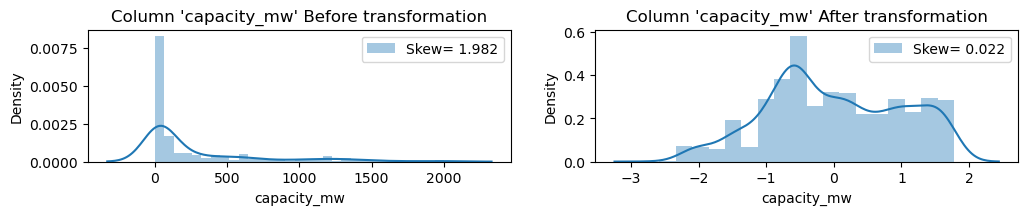

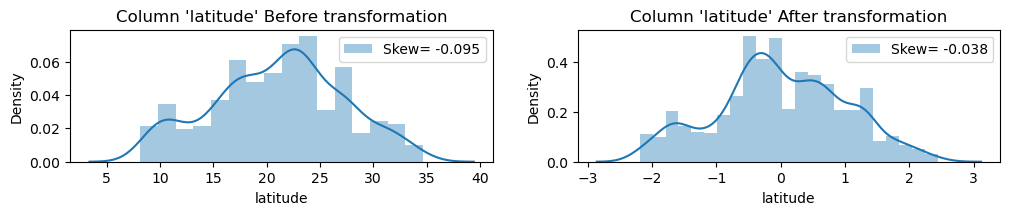

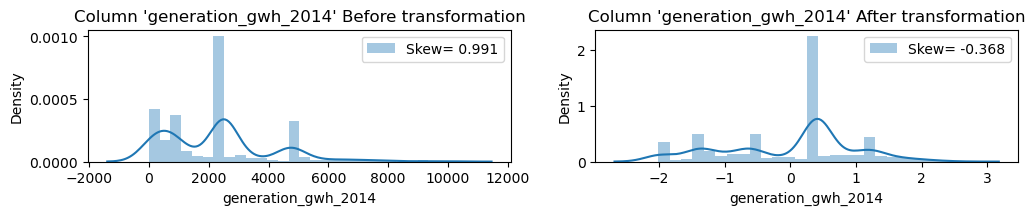

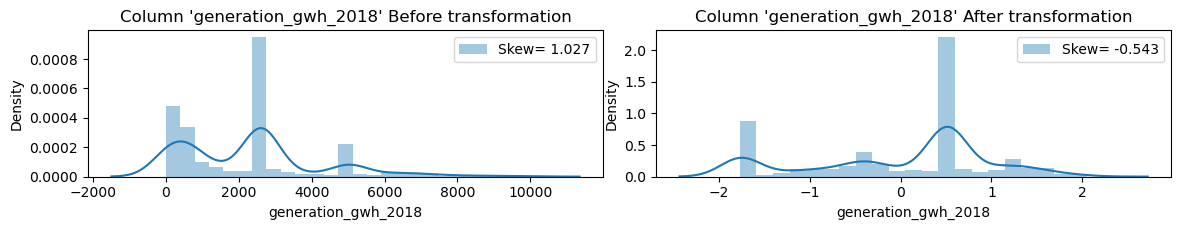

In [266]:
# Distribution plot and skewness
c=1
for i in x[li]:
    plt.figure(figsize=(12,12))
    
    plt.subplot(6,2,c)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(6,2,c+1)
    skew= x[i].skew()
    sns.distplot(x[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Scaling datset

In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [268]:
x = scaler.fit_transform(x)
x

array([[-1.76477834,  1.43183068, -1.16449984,  0.40579402,  0.51305146],
       [ 0.21372404,  0.87210597,  0.37290163,  1.21578903,  1.1829159 ],
       [-0.2932665 ,  0.38952879,  0.37290163,  0.40579402,  0.51305146],
       ...,
       [-0.5406314 , -0.54173115,  0.37290163,  0.40579402,  0.51305146],
       [-0.99705562,  0.39125165,  0.37290163,  0.40579402,  0.51305146],
       [ 0.50191494, -1.61702559,  0.37290163,  0.40579402,  0.51305146]])

In [269]:
y

0       6
1       1
2       7
3       2
4       1
       ..
1875    7
1876    7
1877    7
1878    7
1879    7
Name: primary_fuel, Length: 1880, dtype: int32

#### MODEL

In [286]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [342]:
mdl, acc, rs, tr, cvsc= [],[],[],[],[]

# function to get best random_state
def prediction(model, ran):
    acc=0
    rs=0
    
    for i in range (ran):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=i, stratify=y)
            
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        pred_tr= accuracy_score(y_train, y_tr)    #R2 score of train
        pred_test= accuracy_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(pred_tr*100)-round(pred_test*100))
            
        if ((margin<=1)):   
            print("at random state", i)
            print("Accuracy of train is ",pred_tr*100)
            print("Accuracy of test is ",pred_test*100)
            print("-x"*20)
            print()            
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=best_rs, stratify=y)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    pred_tr= accuracy_score(y_train, y_tr)    # score of train
    pred_test= accuracy_score(y_test,y_pred)       #score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",pred_tr*100)
    print("Accuracy of test is ",pred_test*100)
    print()
    print('Confusion Matrix')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification Report')
    print(classification_report(y_test, y_pred))
          
    #saving the data
    tr.append(pred_tr)
    acc.append(pred_test)
    rs.append(best_rs)
    


def cv_score(model, x, y):    # cross val score of the model
    cvsco=0
    for val in range(2,15):
        cv = cross_val_score(model, x, y, cv = val).mean()
        print('cross_val_score', cv*100,'at cv =', val)
        if cvsco<cv*100:
            cvsco=cv*100
    cvsc.append(cvsco)        

#### Linear Regression

In [343]:
lr= LogisticRegression()
prediction(lr, 50)

at random state 0
Accuracy of train is  65.34954407294833
Accuracy of test is  64.36170212765957
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  67.17325227963525
Accuracy of test is  66.13475177304964
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  64.8936170212766
Accuracy of test is  64.71631205673759
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  65.88145896656535
Accuracy of test is  67.02127659574468
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 8
Accuracy of train is  66.71732522796353
Accuracy of test is  66.31205673758865
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy of train is  65.19756838905775
Accuracy of test is  64.36170212765957
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy of train is  66.03343465045593
Accuracy of test is  65.60283687943263
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Accurac

Best accuracy is at random_state 38

In [344]:
#final metrics
final(lr,38)
mdl.append("LogisticRegression")

at random state 38
Accuracy of train is  67.32522796352583
Accuracy of test is  67.02127659574468

Confusion Matrix
[[45  0  0  0  0  0  0 25]
 [ 2 21 14  6 19  3  0  6]
 [ 0  3 48 10  0  9  0  0]
 [ 3  5 18 37  2  6  0  0]
 [ 0 13  0  0 57  0  0  0]
 [ 0  0  4  0  0 67  0  0]
 [ 0  0  0  0  0  0 69  2]
 [27  7  0  0  2  0  0 34]]

Classification Report
              precision    recall  f1-score   support

           0       0.58      0.64      0.61        70
           1       0.43      0.30      0.35        71
           2       0.57      0.69      0.62        70
           3       0.70      0.52      0.60        71
           4       0.71      0.81      0.76        70
           5       0.79      0.94      0.86        71
           6       1.00      0.97      0.99        71
           7       0.51      0.49      0.50        70

    accuracy                           0.67       564
   macro avg       0.66      0.67      0.66       564
weighted avg       0.66      0.67      0.66     

In [345]:
cv_score(lr,x,y)

cross_val_score 65.15957446808511 at cv = 2
cross_val_score 65.5320652293916 at cv = 3
cross_val_score 65.58510638297872 at cv = 4
cross_val_score 64.68085106382979 at cv = 5
cross_val_score 65.42432320601263 at cv = 6
cross_val_score 64.89307313670626 at cv = 7
cross_val_score 65.4787234042553 at cv = 8
cross_val_score 65.16122766122766 at cv = 9
cross_val_score 64.89361702127658 at cv = 10
cross_val_score 65.64030396847734 at cv = 11
cross_val_score 65.4251047961239 at cv = 12
cross_val_score 65.85064839375184 at cv = 13
cross_val_score 65.42209586985706 at cv = 14


#### DecisionTreeClassifier

In [346]:
dt=DecisionTreeClassifier()
prediction(dt,200)

Best Random_states sorted.


DecisionTree is not feasible.
In such case we will go with any random state and check the metrics.

In [347]:
#final metrics
final(dt,38)
mdl.append("DecisionTreeClassifier")

at random state 38
Accuracy of train is  100.0
Accuracy of test is  84.75177304964538

Confusion Matrix
[[59  0  0  0  0  0  0 11]
 [ 0 42  7 12  9  1  0  0]
 [ 0  7 52 11  0  0  0  0]
 [ 0  6  5 56  4  0  0  0]
 [ 0  7  0  0 63  0  0  0]
 [ 0  1  2  0  0 68  0  0]
 [ 0  0  0  0  0  0 70  1]
 [ 2  0  0  0  0  0  0 68]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.84      0.90        70
           1       0.67      0.59      0.63        71
           2       0.79      0.74      0.76        70
           3       0.71      0.79      0.75        71
           4       0.83      0.90      0.86        70
           5       0.99      0.96      0.97        71
           6       1.00      0.99      0.99        71
           7       0.85      0.97      0.91        70

    accuracy                           0.85       564
   macro avg       0.85      0.85      0.85       564
weighted avg       0.85      0.85      0.85       564



In [348]:
cv_score(dt,x,y)

cross_val_score 87.07446808510639 at cv = 2
cross_val_score 86.27658797492327 at cv = 3
cross_val_score 87.0212765957447 at cv = 4
cross_val_score 87.2340425531915 at cv = 5
cross_val_score 88.08598386954544 at cv = 6
cross_val_score 87.87065733467553 at cv = 7
cross_val_score 87.92553191489361 at cv = 8
cross_val_score 87.71341962131436 at cv = 9
cross_val_score 87.5 at cv = 10
cross_val_score 87.7124183006536 at cv = 11
cross_val_score 87.44385921933691 at cv = 12
cross_val_score 87.65730916592986 at cv = 13
cross_val_score 88.13985627418462 at cv = 14


#### RandomForestClassifier

In [349]:
rf=RandomForestClassifier()
prediction(rf,50)

Best Random_states sorted.


RandomForest is also not feasible

In [352]:
#final metrics
final(rf,38)
mdl.append("RandomForestClassifier")

at random state 38
Accuracy of train is  100.0
Accuracy of test is  89.36170212765957

Confusion Matrix
[[68  0  0  0  0  0  0  2]
 [ 0 44  9  5 11  2  0  0]
 [ 0  4 57  6  0  3  0  0]
 [ 0  2  6 60  3  0  0  0]
 [ 0  0  0  0 70  0  0  0]
 [ 0  0  2  0  0 69  0  0]
 [ 0  0  0  0  0  0 70  1]
 [ 4  0  0  0  0  0  0 66]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        70
           1       0.88      0.62      0.73        71
           2       0.77      0.81      0.79        70
           3       0.85      0.85      0.85        71
           4       0.83      1.00      0.91        70
           5       0.93      0.97      0.95        71
           6       1.00      0.99      0.99        71
           7       0.96      0.94      0.95        70

    accuracy                           0.89       564
   macro avg       0.90      0.89      0.89       564
weighted avg       0.90      0.89      0.89       564



In [353]:
cv_score(rf,x,y)

cross_val_score 89.36170212765957 at cv = 2
cross_val_score 90.37202358204544 at cv = 3
cross_val_score 91.32978723404254 at cv = 4
cross_val_score 91.22340425531915 at cv = 5
cross_val_score 90.74584698452752 at cv = 6
cross_val_score 90.90348839974318 at cv = 7
cross_val_score 91.17021276595744 at cv = 8
cross_val_score 91.48877438351123 at cv = 9
cross_val_score 91.27659574468086 at cv = 10
cross_val_score 90.95881414766862 at cv = 11
cross_val_score 91.32778049975502 at cv = 12
cross_val_score 91.2746831712349 at cv = 13
cross_val_score 91.33183289899709 at cv = 14


#### KNeighborsClassifier

In [354]:
knn= KNeighborsClassifier()
prediction(knn,200)

at random state 23
Accuracy of train is  88.90577507598785
Accuracy of test is  87.58865248226951
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 65
Accuracy of train is  89.36170212765957
Accuracy of test is  88.29787234042553
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 66
Accuracy of train is  89.28571428571429
Accuracy of test is  88.47517730496453
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 71
Accuracy of train is  89.43768996960486
Accuracy of test is  88.12056737588652
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 107
Accuracy of train is  89.8176291793313
Accuracy of test is  88.65248226950354
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 161
Accuracy of train is  88.67781155015197
Accuracy of test is  87.94326241134752
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 175
Accuracy of train is  89.36170212765957
Accuracy of test is  87.58865248226951
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 19

Best accuracy is at random_state 107

In [355]:
#final metrics on any random_state
final(knn,107)
mdl.append("KNeighborsClassifier")

at random state 107
Accuracy of train is  89.8176291793313
Accuracy of test is  88.65248226950354

Confusion Matrix
[[70  0  0  0  0  0  0  1]
 [ 0 45 10  1 15  0  0  0]
 [ 0  2 59  5  0  4  0  0]
 [ 0  2  9 56  3  1  0  0]
 [ 0  3  0  0 67  0  0  0]
 [ 0  0  2  0  0 68  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 6  0  0  0  0  0  0 64]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.87      0.63      0.73        71
           2       0.74      0.84      0.79        70
           3       0.90      0.79      0.84        71
           4       0.79      0.96      0.86        70
           5       0.93      0.97      0.95        70
           6       1.00      1.00      1.00        71
           7       0.98      0.91      0.95        70

    accuracy                           0.89       564
   macro avg       0.89      0.89      0.88       564
weighted avg       0.89      0.89      0.88     

In [356]:
cv_score(knn,x,y)

cross_val_score 84.46808510638297 at cv = 2
cross_val_score 85.90402087123122 at cv = 3
cross_val_score 86.91489361702128 at cv = 4
cross_val_score 86.64893617021276 at cv = 5
cross_val_score 86.80938523839563 at cv = 6
cross_val_score 86.75283962555781 at cv = 7
cross_val_score 87.12765957446808 at cv = 8
cross_val_score 87.02050873103504 at cv = 9
cross_val_score 87.12765957446807 at cv = 10
cross_val_score 86.80864371266848 at cv = 11
cross_val_score 87.01684903914204 at cv = 12
cross_val_score 86.96507515473031 at cv = 13
cross_val_score 87.07494274658453 at cv = 14


#### GaussianNB

In [357]:
gnb= GaussianNB()
prediction(gnb,50)

at random state 0
Accuracy of train is  74.84802431610942
Accuracy of test is  75.35460992907801
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 1
Accuracy of train is  74.69604863221885
Accuracy of test is  75.70921985815603
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 3
Accuracy of train is  74.84802431610942
Accuracy of test is  75.53191489361703
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  73.70820668693008
Accuracy of test is  73.93617021276596
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  74.54407294832826
Accuracy of test is  73.93617021276596
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 8
Accuracy of train is  74.84802431610942
Accuracy of test is  74.29078014184397
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  73.17629179331307
Accuracy of test is  73.93617021276596
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 10
Accuracy

Best random state is at 40

In [358]:
final(gnb,40)
mdl.append("GaussianNB")

at random state 40
Accuracy of train is  75.07598784194529
Accuracy of test is  75.88652482269504

Confusion Matrix
[[63  0  0  0  0  0  0  8]
 [ 0 38  9  2 20  1  0  0]
 [ 0  7 30 14  2 17  0  0]
 [ 0  3 16 50  2  0  0  0]
 [ 0 17  0  0 53  0  0  0]
 [ 0  0  3  0  0 68  0  0]
 [ 0  0  0  0  0  0 70  1]
 [14  0  0  0  0  0  0 56]]

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        71
           1       0.58      0.54      0.56        70
           2       0.52      0.43      0.47        70
           3       0.76      0.70      0.73        71
           4       0.69      0.76      0.72        70
           5       0.79      0.96      0.87        71
           6       1.00      0.99      0.99        71
           7       0.86      0.80      0.83        70

    accuracy                           0.76       564
   macro avg       0.75      0.76      0.75       564
weighted avg       0.75      0.76      0.75     

In [359]:
cv_score(gnb,x,y)

cross_val_score 74.36170212765958 at cv = 2
cross_val_score 73.98977160201308 at cv = 3
cross_val_score 74.09574468085106 at cv = 4
cross_val_score 74.14893617021276 at cv = 5
cross_val_score 73.99099869084199 at cv = 6
cross_val_score 74.14890497063277 at cv = 7
cross_val_score 74.41489361702128 at cv = 8
cross_val_score 73.83092054144686 at cv = 9
cross_val_score 74.14893617021276 at cv = 10
cross_val_score 73.8315038934234 at cv = 11
cross_val_score 73.77715172301158 at cv = 12
cross_val_score 73.77836722664308 at cv = 13
cross_val_score 73.9390349838111 at cv = 14


#### AdaBoostClassifier

In [360]:
adb= AdaBoostClassifier()
prediction(adb,50)

at random state 1
Accuracy of train is  48.78419452887538
Accuracy of test is  48.758865248226954
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 2
Accuracy of train is  56.99088145896657
Accuracy of test is  56.73758865248227
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 4
Accuracy of train is  64.74164133738601
Accuracy of test is  64.53900709219859
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 5
Accuracy of train is  57.52279635258358
Accuracy of test is  57.09219858156028
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 7
Accuracy of train is  48.93617021276596
Accuracy of test is  48.40425531914894
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  49.088145896656535
Accuracy of test is  48.758865248226954
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 11
Accuracy of train is  56.306990881458965
Accuracy of test is  56.560283687943254
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Ac

Best random_state is at 13.

In [361]:
#final metrics on any random_state
final(adb,13)
mdl.append("AdaBoost")

at random state 13
Accuracy of train is  68.38905775075987
Accuracy of test is  68.97163120567376

Confusion Matrix
[[71  0  0  0  0  0  0  0]
 [ 0 27 10  7 26  0  0  0]
 [ 0  2 56 12  0  1  0  0]
 [ 0  1 34 32  3  0  0  0]
 [ 0  6  5  0 59  0  0  0]
 [ 0  0  7  0  0 63  0  0]
 [ 0  0  0  0  0  0 70  1]
 [60  0  0  0  0  0  0 11]]

Classification Report
              precision    recall  f1-score   support

           0       0.54      1.00      0.70        71
           1       0.75      0.39      0.51        70
           2       0.50      0.79      0.61        71
           3       0.63      0.46      0.53        70
           4       0.67      0.84      0.75        70
           5       0.98      0.90      0.94        70
           6       1.00      0.99      0.99        71
           7       0.92      0.15      0.27        71

    accuracy                           0.69       564
   macro avg       0.75      0.69      0.66       564
weighted avg       0.75      0.69      0.66     

In [362]:
cv_score(adb,x,y)

cross_val_score 50.95744680851064 at cv = 2
cross_val_score 52.45043337358791 at cv = 3
cross_val_score 58.08510638297872 at cv = 4
cross_val_score 57.340425531914896 at cv = 5
cross_val_score 55.803877278308 at cv = 6
cross_val_score 53.62096844508207 at cv = 7
cross_val_score 57.07446808510639 at cv = 8
cross_val_score 56.38776428250112 at cv = 9
cross_val_score 54.840425531914896 at cv = 10
cross_val_score 53.6166619757951 at cv = 11
cross_val_score 54.254790679949906 at cv = 12
cross_val_score 53.246389625699976 at cv = 13
cross_val_score 52.93650793650792 at cv = 14


#### SVC

In [363]:
svc = SVC()
prediction(svc,50)

at random state 5
Accuracy of train is  81.30699088145896
Accuracy of test is  81.73758865248227
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 6
Accuracy of train is  81.91489361702128
Accuracy of test is  81.20567375886525
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 8
Accuracy of train is  81.99088145896657
Accuracy of test is  80.85106382978722
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 9
Accuracy of train is  81.15501519756839
Accuracy of test is  81.02836879432624
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 12
Accuracy of train is  81.38297872340425
Accuracy of test is  81.20567375886525
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 14
Accuracy of train is  81.99088145896657
Accuracy of test is  80.67375886524822
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 15
Accuracy of train is  81.61094224924013
Accuracy of test is  80.85106382978722
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 19
Accur

Best random_state is at 25.

In [364]:
final(svc,25)
mdl.append("SVC")

at random state 25
Accuracy of train is  81.99088145896657
Accuracy of test is  81.73758865248227

Confusion Matrix
[[67  0  0  0  0  0  0  3]
 [ 0 44  5  1 17  3  0  0]
 [ 0  3 44 16  1  7  0  0]
 [ 0  2 10 58  0  0  0  0]
 [ 0  8  0  0 63  0  0  0]
 [ 0  0  1  0  0 69  0  0]
 [ 0  0  0  0  0  0 68  3]
 [23  0  0  0  0  0  0 48]]

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        70
           1       0.77      0.63      0.69        70
           2       0.73      0.62      0.67        71
           3       0.77      0.83      0.80        70
           4       0.78      0.89      0.83        71
           5       0.87      0.99      0.93        70
           6       1.00      0.96      0.98        71
           7       0.89      0.68      0.77        71

    accuracy                           0.82       564
   macro avg       0.82      0.82      0.81       564
weighted avg       0.82      0.82      0.81     

In [365]:
cv_score(svc,x,y)

cross_val_score 80.15957446808511 at cv = 2
cross_val_score 79.78744906607695 at cv = 3
cross_val_score 80.69148936170212 at cv = 4
cross_val_score 80.3723404255319 at cv = 5
cross_val_score 80.53221003506917 at cv = 6
cross_val_score 80.6374394622744 at cv = 7
cross_val_score 80.79787234042554 at cv = 8
cross_val_score 80.63913425755531 at cv = 9
cross_val_score 80.79787234042554 at cv = 10
cross_val_score 80.90596366138162 at cv = 11
cross_val_score 80.63721487288367 at cv = 12
cross_val_score 81.06284998526377 at cv = 13
cross_val_score 80.95711916607439 at cv = 14


#### Model Summary

In [366]:
pd.DataFrame({"Model name": mdl, "Random_state":rs, "Train_Accuracy": tr, "Test_Accuracy": acc, "CV_score": cvsc})

Model name  Random_state  Train_Accuracy  Test_Accuracy  \
0      LogisticRegression            38        0.673252       0.670213   
1  DecisionTreeClassifier            38        1.000000       0.847518   
2  RandomForestClassifier           114        1.000000       0.900709   
3  RandomForestClassifier            38        1.000000       0.893617   
4    KNeighborsClassifier           107        0.898176       0.886525   
5              GaussianNB            40        0.750760       0.758865   
6                AdaBoost            13        0.683891       0.689716   
7                     SVC            25        0.819909       0.817376   

    CV_score  
0  65.850648  
1  88.139856  
2  91.489362  
3  91.488774  
4  87.127660  
5  74.414894  
6  58.085106  
7  81.062850

From the above data, we can see that KneighborsClassifier have better metrics.

#### Hyperparameter Tunning

In [367]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [371]:
param = {'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'],
         'leaf_size' :[10, 20, 30],
         'p' : [1,2],
         'n_neighbors': [3,5,7,9,11],
         'weights': ['uniform', 'distance']
}
grid = GridSearchCV(knn, param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30],
                         'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [372]:
# getting best parameters
grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [373]:
knnht=KNeighborsClassifier(algorithm='auto',  n_neighbors = 3, p = 1, weights= 'distance', n_jobs=-1)

In [375]:
model= knnht
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=107, stratify=y)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  100.0
Accuracy of test is  89.53900709219859

Confusion Matrix
[[67  0  0  0  0  0  0  4]
 [ 0 46  8  2 14  1  0  0]
 [ 0  1 58  7  0  4  0  0]
 [ 0  2  4 62  3  0  0  0]
 [ 0  3  1  0 66  0  0  0]
 [ 0  0  1  0  0 69  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 3  0  0  0  0  0  1 66]]

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.88      0.65      0.75        71
           2       0.81      0.83      0.82        70
           3       0.87      0.87      0.87        71
           4       0.80      0.94      0.86        70
           5       0.93      0.99      0.96        70
           6       0.99      1.00      0.99        71
           7       0.94      0.94      0.94        70

    accuracy                           0.90       564
   macro avg       0.90      0.90      0.89       564
weighted avg       0.90      0.90      0.89       564



Even after Hyper_tunning, the model gets overfitted.

we will stick with KNeighborsClassifier before tunning.

In [376]:
model= knn
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=107, stratify=y)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test

pred_tr= accuracy_score(y_train, y_tr)    #score of train
pred_test= accuracy_score(y_test,y_pred)       #score of test

print("Accuracy of train is ",pred_tr*100)
print("Accuracy of test is ",pred_test*100)
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

Accuracy of train is  89.8176291793313
Accuracy of test is  88.65248226950354

Confusion Matrix
[[70  0  0  0  0  0  0  1]
 [ 0 45 10  1 15  0  0  0]
 [ 0  2 59  5  0  4  0  0]
 [ 0  2  9 56  3  1  0  0]
 [ 0  3  0  0 67  0  0  0]
 [ 0  0  2  0  0 68  0  0]
 [ 0  0  0  0  0  0 71  0]
 [ 6  0  0  0  0  0  0 64]]

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        71
           1       0.87      0.63      0.73        71
           2       0.74      0.84      0.79        70
           3       0.90      0.79      0.84        71
           4       0.79      0.96      0.86        70
           5       0.93      0.97      0.95        70
           6       1.00      1.00      1.00        71
           7       0.98      0.91      0.95        70

    accuracy                           0.89       564
   macro avg       0.89      0.89      0.88       564
weighted avg       0.89      0.89      0.88       564



In [378]:
cross_val_score(knn, x, y, cv = 8).mean()

0.8712765957446809

#### AUC-ROC Curve

In [381]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

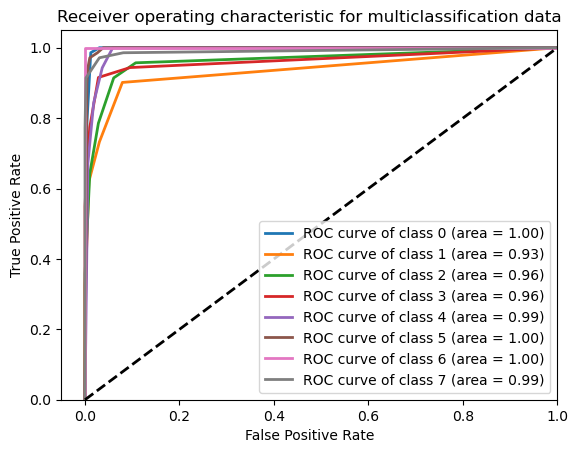

In [396]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier


classifier = OneVsRestClassifier(knn)
y_score = classifier.fit(x_train, y_train).predict_proba(x_test)

#Binarize the output
y_df_test_bin  = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7])
n_classes = 8

# Compute ROC curve and AUC for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_df_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(false_positive_rate[i], true_positive_rate[i])
    
   
for i in range(n_classes):
    plt.plot(false_positive_rate[i], true_positive_rate[i], lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc="lower right")
plt.show()

#### Saving model

In [397]:
import pickle

#saving model
pickle.dump(knn, open('power.pkl', 'wb'))

In [398]:
#Load model
file= pickle.load(open('power.pkl', 'rb'))

In [399]:
file.predict(x_test)

array([4, 1, 1, 2, 0, 4, 4, 6, 4, 3, 4, 7, 5, 7, 6, 4, 2, 5, 2, 2, 5, 0,
       2, 0, 1, 5, 3, 3, 7, 4, 4, 2, 0, 7, 6, 1, 5, 3, 5, 2, 7, 7, 7, 1,
       6, 5, 6, 6, 0, 4, 4, 0, 7, 3, 7, 0, 2, 2, 7, 7, 2, 4, 5, 5, 4, 2,
       6, 1, 2, 7, 5, 5, 3, 3, 4, 2, 0, 0, 5, 2, 0, 5, 6, 0, 3, 6, 5, 1,
       2, 5, 3, 2, 6, 5, 5, 6, 3, 3, 0, 1, 6, 4, 5, 1, 7, 0, 3, 1, 2, 5,
       0, 5, 4, 4, 1, 0, 3, 0, 1, 1, 5, 6, 1, 1, 2, 7, 5, 0, 4, 4, 4, 1,
       2, 6, 2, 2, 7, 4, 7, 0, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 3, 2, 2, 5,
       6, 6, 2, 5, 4, 7, 2, 7, 3, 0, 1, 6, 2, 3, 6, 0, 0, 2, 5, 2, 4, 3,
       0, 4, 0, 5, 3, 1, 3, 2, 7, 7, 1, 2, 2, 1, 0, 4, 7, 6, 6, 3, 2, 4,
       5, 6, 2, 6, 5, 5, 7, 5, 0, 6, 6, 1, 4, 1, 6, 7, 7, 2, 2, 3, 5, 4,
       6, 4, 4, 3, 3, 3, 2, 3, 5, 5, 0, 2, 3, 2, 7, 0, 4, 0, 5, 0, 3, 3,
       3, 7, 7, 6, 4, 1, 3, 2, 6, 7, 4, 4, 2, 4, 0, 5, 1, 7, 4, 2, 5, 2,
       6, 2, 2, 0, 2, 6, 0, 0, 0, 1, 0, 5, 7, 0, 5, 2, 5, 4, 4, 4, 6, 1,
       0, 5, 5, 2, 0, 0, 4, 0, 1, 3, 4, 4, 7, 7, 5,

#### Conclusion

In [400]:
pd.set_option('display.max_rows', None)

In [401]:
end= pd.DataFrame({"y_test actual": y_test, "Predicted output": y_pred, "Predicted output pickle": file.predict(x_test),
             "Correct Prediction?": y_test==y_pred})
end.shape

(564, 4)

In [403]:
end.sample(50)

y_test actual  Predicted output  Predicted output pickle  \
1679              6                 6                        6   
128               6                 6                        6   
1455              5                 5                        5   
314               3                 3                        3   
1719              6                 6                        6   
1399              4                 4                        4   
412               3                 2                        2   
459               7                 7                        7   
1183              2                 2                        2   
564               3                 2                        2   
773               7                 7                        7   
937               0                 0                        0   
135               3                 3                        3   
1073              2                 2                        2   
905               0                 0                        0   
1748              6                 6                        6   
321               1                 1                        1   
1087              2                 2                        2   
1525              5                 5                        5   
140               1                 1                        1   
1811              7                 7                        7   
1564              5                 5                        5   
226               2                 2                        2   
1734              6                 6                        6   
1799              7                 7                        7   
1391              4                 4                        4   
824               3                 3                        3   
1523              5                 5                        5   
542               0                 0                        0   
210               2                 2                        2   
1691              6                 6                        6   
1794              7                 7                        7   
1017              0                 0                        0   
449               1                 1                        1   
254               7                 0                        0   
99                3                 3                        3   
1128              2                 2                        2   
853               0                 0                        0   
175               0                 0                        0   
446               3                 3                        3   
466               2                 2                        2   
101               1                 1                        1   
908               0                 0                        0   
443               1                 2                        2   
411               3                 3                        3   
1694              6                 6                        6   
93                0                 0                        0   
472               6                 6                        6   
1130              2                 2                        2   
1341              4                 4                        4   

      Correct Prediction?  
1679                 True  
128                  True  
1455                 True  
314                  True  
1719                 True  
1399                 True  
412                 False  
459                  True  
1183                 True  
564                 False  
773                  True  
937                  True  
135                  True  
1073                 True  
905                  True  
1748                 True  
321                  True  
1087                 True  
1525                 True  
140                  True  
1811                 True  
1564                 Tr

### Prediction on capacity_mw

In [407]:
target= 'capacity_mw'

In [408]:
df2.head()

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0          2.5   28.1839    73.2407             6                2011   
1         98.0   24.7663    74.6090             1                2006   
2         39.2   21.9038    69.3732             7                2000   
3        135.0   23.8712    91.3602             2                2004   
4       1800.0   21.9603    82.4091             1                2015   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1          2498.743142          2428.863290   
1                   2          4737.279310          4649.585751   
2                   2          2498.743142          2428.863290   
3                   2           617.789264           843.747000   
4                   2          3035.550000          5916.370000   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0          2470.332276          2521.386641          2605.373790  
1          4761.233946          4870.537285          5036.420635  
2          2470.332276          2521.386641          2605.373790  
3           886.004428           663.774500           626.239128  
4          6243.000000          5385.579736          7279.000000

In [409]:
df2.shape

(850, 11)

#### Splitting target and features

In [410]:
x= df2.drop(target, axis=1)
y=df2[target]

print(x.shape, y.shape)

(850, 10) (850,)


#### VIF

In [411]:
def vif_(x1):
    vif= pd.DataFrame()
    vif['Features']= x1.columns
    vif['VIF']= [variance_inflation_factor(x1.values, i) for i in range(x1.shape[1])]
    print(vif)

In [412]:
vif_(x)

              Features         VIF
0             latitude   13.694877
1            longitude  384.546693
2         primary_fuel    4.601670
3   commissioning_year  438.558248
4   geolocation_source    9.988129
5  generation_gwh_2014   12.375466
6  generation_gwh_2015   26.706497
7  generation_gwh_2016   36.410136
8  generation_gwh_2017   52.159488
9  generation_gwh_2018   45.246963


VIF score of few column is very high.

In [413]:
#dropping commissioning_year
x=x.drop('commissioning_year', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0             latitude  13.089170
1            longitude  35.079365
2         primary_fuel   3.517700
3   geolocation_source   9.850675
4  generation_gwh_2014  12.367873
5  generation_gwh_2015  26.513747
6  generation_gwh_2016  36.286801
7  generation_gwh_2017  52.117840
8  generation_gwh_2018  45.246923


In [414]:
#dropping generation_gwh_2017
x=x.drop('generation_gwh_2017', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0             latitude  13.059153
1            longitude  35.064473
2         primary_fuel   3.516339
3   geolocation_source   9.849903
4  generation_gwh_2014  12.292502
5  generation_gwh_2015  26.234632
6  generation_gwh_2016  32.330981
7  generation_gwh_2018  15.817558


In [415]:
#dropping longitude
x=x.drop('longitude', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0             latitude   6.897204
1         primary_fuel   2.583294
2   geolocation_source   4.243402
3  generation_gwh_2014  12.247744
4  generation_gwh_2015  26.220584
5  generation_gwh_2016  32.253059
6  generation_gwh_2018  15.798876


In [416]:
#dropping generation_gwh_2016
x=x.drop('generation_gwh_2016', axis=1)

# VIF or remaining columns
vif_(x)

              Features        VIF
0             latitude   6.897192
1         primary_fuel   2.582326
2   geolocation_source   4.241723
3  generation_gwh_2014  12.123857
4  generation_gwh_2015  14.854975
5  generation_gwh_2018   8.832350


In [417]:
#generation_gwh_2015
x=x.drop('generation_gwh_2015', axis=1)

# VIF or remaining columns
vif_(x)

              Features       VIF
0             latitude  6.897100
1         primary_fuel  2.581717
2   geolocation_source  4.241451
3  generation_gwh_2014  7.013212
4  generation_gwh_2018  6.576010


#### Skewness

In [418]:
x.skew()

latitude              -0.094890
primary_fuel           0.409341
geolocation_source    -2.064570
generation_gwh_2014    0.990907
generation_gwh_2018    1.027242
dtype: float64

we can see that data is skewed.

In [419]:
li=['latitude', 'generation_gwh_2014', 'generation_gwh_2018']

In [420]:
# PowerTransformation
from sklearn.preprocessing import PowerTransformer
pw = PowerTransformer()

In [421]:
x_pw = pw.fit_transform(x[li])
df3 = pd.DataFrame(x_pw, columns =li)

In [423]:
df3.sample(10)

latitude  generation_gwh_2014  generation_gwh_2018
447  0.662179             1.224943            -1.593237
673  0.659695             1.224943             1.228926
340 -0.825103             0.360242             0.408942
360 -0.787491             0.360242             0.408942
69  -0.725075             0.360242             0.408942
830  0.051985             0.360242             0.408942
214  0.589016            -1.275378            -1.190274
475  1.418864             0.360242             0.408942
31   1.024992             0.360242             0.408942
246 -0.732641             0.360242             0.408942

In [424]:
df3.skew()

latitude              -0.071161
generation_gwh_2014   -0.274106
generation_gwh_2018   -0.344575
dtype: float64

In [426]:
x[li]=df3
x.shape

(850, 5)

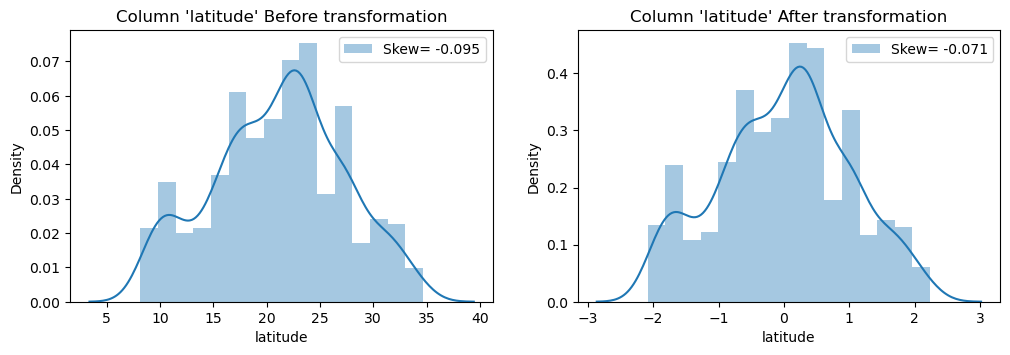

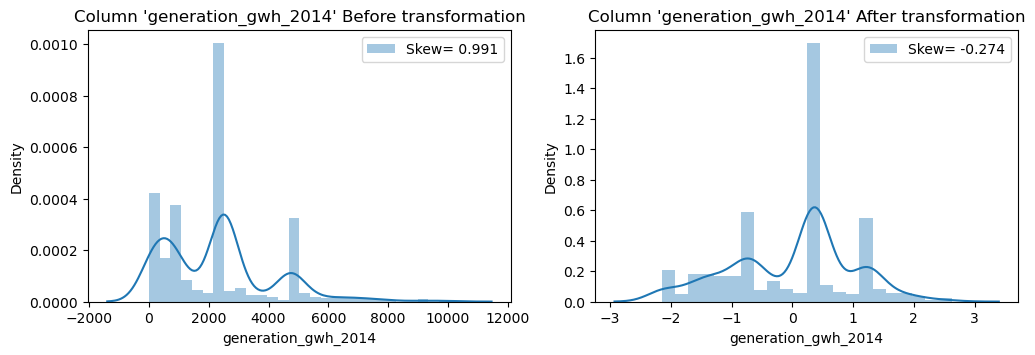

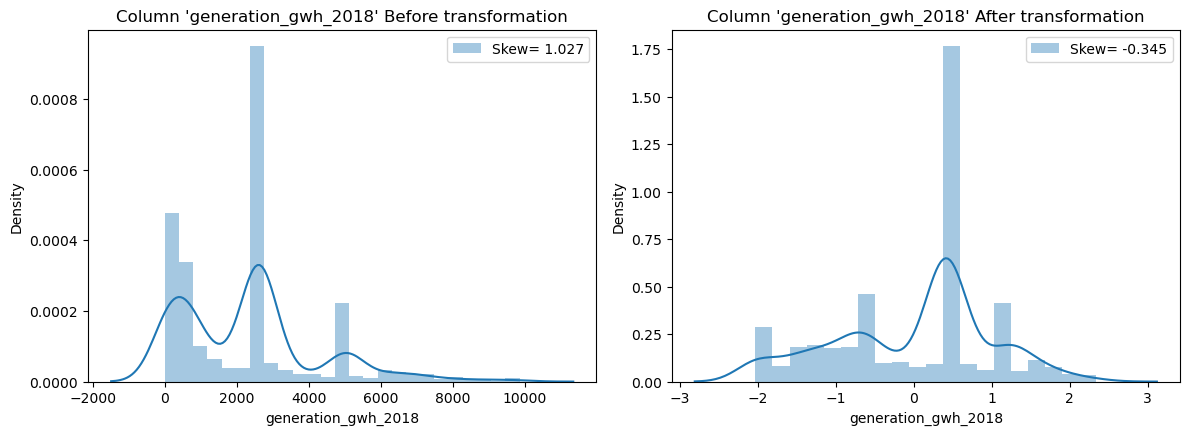

In [428]:
# Distribution plot and skewness
c=1
for i in x[li]:
    plt.figure(figsize=(12,12))
    
    plt.subplot(3,2,c)
    skew= df2[i].skew()
    sns.distplot(df2[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' Before transformation")
    
    plt.subplot(3,2,c+1)
    skew= x[i].skew()
    sns.distplot(x[i], label= 'Skew= %.3f' %skew)
    plt.legend(loc='upper right')
    plt.title("Column '"+i+"' After transformation")
    
    c+=2
    
plt.tight_layout()

#### Scaling datset

In [429]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [430]:
x = scaler.fit_transform(x)
x

array([[ 1.1630837 ,  1.17360351, -1.03553575,  0.36024158,  0.40894244],
       [ 0.5999629 , -0.98002987,  0.4074239 ,  1.22494298,  1.22892637],
       [ 0.13048205,  1.60433019,  0.4074239 ,  0.36024158,  0.40894244],
       ...,
       [-0.94746337,  1.60433019,  0.4074239 ,  0.36024158,  0.40894244],
       [ 0.53155605, -0.98002987,  0.4074239 ,  1.22494298,  1.22892637],
       [-1.80412148,  1.60433019,  0.4074239 ,  0.36024158,  0.40894244]])

#### MODEL

In [443]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [489]:
mdl, scr, rs= [],[],[]

# function to get best random_state
def prediction(model):
    acc=0
    rs=0
    for i in range (500):
        x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=i)
    
        model.fit(x_train, y_train)     #train model
        y_tr= model.predict(x_train)    #prediction on train
        y_pred=model.predict(x_test)    #prediction on test
        
        score_tr= r2_score(y_train, y_tr)    #R2 score of train
        score= r2_score(y_test,y_pred)       #R2 score of test
    
    #sort randomstate at which train and test score difference is 1.
        margin=np.abs(round(score_tr*100)-round(score*100))
            
        if ((margin<=1) and (round(score*100)>=75)):    
            print("at random state", i)
            print("Accuracy of train is ",score_tr*100)
            print("Accuracy of test is ",score*100)
            print("-x"*20)
            print()
    
    print("Best Random_states sorted.")

    
# function to get score at the best random_state
def final(model, best_rs):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=best_rs)
    
    model.fit(x_train, y_train)     #train model
    y_tr= model.predict(x_train)    #prediction on train
    y_pred=model.predict(x_test)    #prediction on test
    
    score_tr= r2_score(y_train, y_tr)    #R2 score of train
    score= r2_score(y_test,y_pred)       #R2 score of test
    
    print("at random state", best_rs)
    print("Accuracy of train is ",score_tr*100)
    print("Accuracy of test is ",score*100)
    print()

    
    #saving the data
    #mdl.append(model)
    scr.append(score)
    rs.append(best_rs)

#### Linear regression

In [492]:
# Linear regression
lr= LinearRegression()
prediction(lr)

Best Random_states sorted.


In [493]:
# Final prediction
final(lr,1)

mdl.append("LinearRegression")

at random state 1
Accuracy of train is  28.860215829684734
Accuracy of test is  25.13267153780673



#### Lasso

In [494]:
param = {"alpha": np.arange(0.001, 0.15,0.01), 'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004],
         'selection': ['cyclic', 'random']}

grid = GridSearchCV(Lasso(), param_grid=param)
grid.fit(x, y)


GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141]),
                         'max_iter': [500, 1000, 1500, 2000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.0002, 0.0003, 0.0004]})

In [495]:
grid.best_params_

{'alpha': 0.141, 'max_iter': 2000, 'selection': 'random', 'tol': 0.0001}

In [496]:
lso= Lasso(alpha= 0.141, max_iter= 2000, selection= 'random', tol= 0.0001)

prediction(lso)

Best Random_states sorted.


In [497]:
# Final prediction
final(lso,1)

mdl.append("Lasso")

at random state 1
Accuracy of train is  28.86012659547714
Accuracy of test is  25.133820989908486



#### Ridge

In [498]:
param = {"alpha": np.arange(0.001, 0.15,0.01), 'max_iter': [500, 1000, 1500, 2000], 'tol': [.0001, .0002, .0003, .0004],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

grid = GridSearchCV(Ridge(), param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141]),
                         'max_iter': [500, 1000, 1500, 2000],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs'],
                         'tol': [0.0001, 0.0002, 0.0003, 0.0004]})

In [499]:
# getting best parameters
grid.best_params_

{'alpha': 0.13099999999999998,
 'max_iter': 2000,
 'solver': 'sag',
 'tol': 0.0004}

In [500]:
rdg= Ridge(alpha= 0.13099999999999998, max_iter= 2000, solver= 'sag', tol= 0.0004)
prediction(rdg)

Best Random_states sorted.


In [501]:
# Final prediction
final(rdg,1)

mdl.append("Ridge")

at random state 1
Accuracy of train is  28.860214048473498
Accuracy of test is  25.13238546705511



#### ElasticNet

In [502]:
param = {"alpha": np.arange(0.001, 0.15,0.01), 'l1_ratio': [.5,.1,.2,1,.05],'max_iter': [500, 1000, 1500, 2000], 
         'tol': [.0001, .0002, .0003, .0004], 'selection': ['cyclic', 'random']}

grid = GridSearchCV(ElasticNet(), param_grid=param)
grid.fit(x, y)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091, 0.101, 0.111, 0.121, 0.131, 0.141]),
                         'l1_ratio': [0.5, 0.1, 0.2, 1, 0.05],
                         'max_iter': [500, 1000, 1500, 2000],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 0.0002, 0.0003, 0.0004]})

In [503]:
# getting best parameters
grid.best_params_

{'alpha': 0.13099999999999998,
 'l1_ratio': 0.2,
 'max_iter': 1000,
 'selection': 'random',
 'tol': 0.0001}

In [504]:
eln= ElasticNet(alpha = 0.13099999999999998, l1_ratio = 0.2, max_iter = 1000, selection = 'random', tol = 0.0001)
prediction(eln)

Best Random_states sorted.


In [505]:
# Final prediction
final(eln,1)

mdl.append("ElasticNet")

at random state 1
Accuracy of train is  28.641213527613395
Accuracy of test is  24.984433779915726



#### DecisionTreeRegressor

In [506]:
#DecisionTreeRegressor
dt= DecisionTreeRegressor()

prediction(dt)

Best Random_states sorted.


In [507]:
#DecisionTreeRegressor with Hypertunning
param= { 'max_depth': range(2,15), 'min_samples_leaf': range(2,10),
        'min_samples_split': range(3,10), 'max_leaf_nodes': range(2,10)}
grid=GridSearchCV(DecisionTreeRegressor(),param)
grid.fit(x,y)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 10),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [508]:
grid.best_params_

{'max_depth': 7,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 7}

In [517]:
dt= DecisionTreeRegressor(max_depth= 7,max_leaf_nodes= 9,min_samples_leaf= 9,min_samples_split= 7)
prediction(dt)

at random state 13
Accuracy of train is  79.71126542861855
Accuracy of test is  80.72520661367926
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 16
Accuracy of train is  78.88793537315665
Accuracy of test is  80.19857119636812
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 18
Accuracy of train is  77.9834663606174
Accuracy of test is  78.8410059454479
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 24
Accuracy of train is  79.35263340901388
Accuracy of test is  78.15868800545533
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 37
Accuracy of train is  78.84074721278789
Accuracy of test is  79.73910870477677
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 43
Accuracy of train is  78.54338669398257
Accuracy of test is  80.37169934403323
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 58
Accuracy of train is  79.59569049628347
Accuracy of test is  78.95011302459005
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 59
Acc

at random state 395
Accuracy of train is  78.63875655836921
Accuracy of test is  79.87933279867778
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 402
Accuracy of train is  79.36026517611513
Accuracy of test is  78.40869399016573
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 412
Accuracy of train is  79.38015208085828
Accuracy of test is  79.96024094751344
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 415
Accuracy of train is  80.11598688036197
Accuracy of test is  78.77616126226727
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 421
Accuracy of train is  77.48608565345012
Accuracy of test is  75.87248498058953
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 427
Accuracy of train is  79.57083872804954
Accuracy of test is  79.08924496184028
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 433
Accuracy of train is  79.4909543280941
Accuracy of test is  78.2199563596005
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state

Best accuracy is at random_state 78

In [518]:
# Final prediction
final(dt,78)

mdl.append("DecisionTree")

at random state 78
Accuracy of train is  79.4113875321421
Accuracy of test is  78.55771811146704



#### RandomForest

In [519]:
#RandomForestRegressor
rf= RandomForestRegressor()

prediction(rf)

Best Random_states sorted.


In [520]:
#RandomForestRegressor with HyperTuning
param= {'n_estimators':[100,200,300],'max_depth':np.arange(2,15)}
grid=GridSearchCV(RandomForestRegressor(),param)
grid.fit(x,y)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'n_estimators': [100, 200, 300]})

In [521]:
grid.best_params_

{'max_depth': 7, 'n_estimators': 100}

In [522]:
rf= RandomForestRegressor(n_estimators=100, max_depth=7, n_jobs=-1)
prediction(rf)

at random state 297
Accuracy of train is  89.66969561778744
Accuracy of test is  88.58543468871794
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

Best Random_states sorted.


In [523]:
# Final prediction
final(rf,297)

mdl.append("RandomForest")

at random state 297
Accuracy of train is  89.4073090047437
Accuracy of test is  87.92528317124994



#### KNN

In [524]:
knn=KNeighborsRegressor(n_neighbors=5)
prediction(knn)

at random state 12
Accuracy of train is  76.82533312988312
Accuracy of test is  76.75975280511109
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 13
Accuracy of train is  77.18865340553836
Accuracy of test is  77.06350019946393
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 35
Accuracy of train is  77.0207040830058
Accuracy of test is  75.7924171151074
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 43
Accuracy of train is  75.5800960577188
Accuracy of test is  75.18811264116316
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 48
Accuracy of train is  76.5509216640366
Accuracy of test is  76.82033149135583
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 50
Accuracy of train is  76.19202167344817
Accuracy of test is  76.86254007793225
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 52
Accuracy of train is  76.59227129519573
Accuracy of test is  76.94019420563735
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x

at random state 59
Accur

Best accuracy is at random_state 93

In [526]:
# Final prediction
final(knn,93)

mdl.append("KNN")

at random state 93
Accuracy of train is  78.16760539658657
Accuracy of test is  77.35965766329991



#### SVR

In [527]:
#SVR
prediction(SVR())

Best Random_states sorted.


In [528]:
#SVR with Hyperparameter tuning
param = {"kernel": ['rbf', 'poly', 'linear'], 'degree': np.arange(1,5), 'gamma': ['scale', 'auto'], 
         'epsilon': np.arange(0.1,0.5,0.1)}
grid=GridSearchCV(SVR(),param)
grid.fit(x,y)

GridSearchCV(estimator=SVR(),
             param_grid={'degree': array([1, 2, 3, 4]),
                         'epsilon': array([0.1, 0.2, 0.3, 0.4]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly', 'linear']})

In [529]:
grid.best_params_

{'degree': 1, 'epsilon': 0.4, 'gamma': 'scale', 'kernel': 'linear'}

In [530]:
svr= SVR(degree= 1, epsilon= 0.4, gamma= 'scale', kernel= 'linear')
prediction(svr)

Best Random_states sorted.


In [531]:
final(svr,93)
mdl.append("KNeighborsRegressor")

at random state 93
Accuracy of train is  5.544800999493383
Accuracy of test is  4.176878298198005



#### Model Summary

In [532]:
pd.DataFrame({"Model name": mdl, "R2_score": scr, "Random_state":rs})

Model name  R2_score  Random_state
0     LinearRegression  0.251327             1
1                Lasso  0.251338             1
2                Ridge  0.251324             1
3           ElasticNet  0.249844             1
4         DecisionTree  0.680895            78
5         DecisionTree  0.785577            78
6         RandomForest  0.879253           297
7         RandomForest  0.820535            93
8                  KNN  0.773597            93
9  KNeighborsRegressor  0.041769            93

Random forest is giving better accuracy

In [534]:
model=rf
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.25, random_state=297)
    
model.fit(x_train, y_train)     #train model
y_tr= model.predict(x_train)    #prediction on train
y_pred=model.predict(x_test)    #prediction on test
score_tr= r2_score(y_train, y_tr)    #R2 score of train
score= r2_score(y_test,y_pred)       #R2 score of test

print("Accuracy of train is ",score_tr*100)
print("Accuracy of test is ",score*100)

Accuracy of train is  89.51971061037366
Accuracy of test is  88.66803736033731


#### Saving the model

In [537]:
import pickle

#saving model
pickle.dump(rf, open('powerreg.pkl', 'wb'))

In [538]:
#Load model
file= pickle.load(open('powerreg.pkl', 'rb'))

In [539]:
file.predict(x_test)

array([ 519.87602556,   15.47448883,   82.61569684,   30.4765188 ,
         65.48329206,  109.23196134,  897.72326866,  405.56818778,
         64.41468149,  512.71032094,  114.38843239,   65.05338262,
         33.28780813,   24.90379538, 1394.85861589,   33.69565098,
        463.3217621 ,   73.57399652,   23.46962072, 1402.75464222,
       1158.40845604,   96.32207722,  146.64001175,  109.23196134,
        174.23062451,   12.25042546,   45.65132898,   47.74514433,
         39.40853645,   15.90468014,  593.32200545,   47.67321576,
         75.09850504,   42.80715583, 1355.29868804,  262.26433855,
         16.37772308, 1426.12077858,  289.54766035,   33.69565098,
         55.17877441,   15.5591929 ,   57.66702558,  541.7443829 ,
         65.48329206,   17.19845117,   61.16408325,   25.61108717,
        109.23196134,   61.16408325,  108.0832963 ,   80.30493307,
        108.0832963 ,   65.48329206,   36.40826341,   46.3742298 ,
         46.3742298 ,  109.23196134,   65.48329206,   65.48329